# Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

# Problem Statement

**To predict which customer is more likely to purchase the newly introduced travel package.**

# Data Description

**Customer details:**

CustomerID: Unique customer ID
- ProdTaken: Product taken flag
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisited: Total number of person came with customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of the trip in a year by customer
- Passport: The customer has passport or not
- OwnCar: Customers owns a car flag
- NumberOfChildrenVisited: Total number of children with age less than 5 visit with customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

**Customer interaction data:**

- PitchSatisfactionScore: 
- Sales pitch satisfactory score
- ProductPitched: Product pitched by a salesperson
- NumberOfFollowups: Total number of follow up has been done by sales person after sales pitch
- DurationOfPitch: Duration of the pitch by a salesman to customer

## Index

- <a href = #link1>Dataset Overview </a>

- <a href = #link2>EDA </a> 

- <a href = #link3>Data Pre-Processing</a>

- <a href = #link4>Univariate Analysis </a> 

- <a href = #link5>Bivariate Analysis</a>

- <a href = #link6>Split the dataset</a>

- <a href = #link7>Building Models</a>

- <a href = #link8>Decision Tree</a>

- <a href = #link9>Bagging Classifier</a>

- <a href = #link10>Random Forest Classifier</a>

- <a href = #link11>Adaboost, XGBoost, Gradient Boost and Stacking Classifier</a>

- <a href = #link12>Comparing all models</a>

- <a href = #link13>Insights & Recommendations</a>


## <a id = "link1"></a> Dataset Overview

In [168]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")
#importing necessary packages
%matplotlib inline
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor, BaggingClassifier, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier


pd.options.display.max_rows = 4000

In [2]:
#loading dataset. 
#Using pandas dataframe and reading an excel file 
df = pd.read_excel("Tourism.xlsx", sheet_name='Tourism')

In [3]:
df.head()

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  41.0     Self Enquiry         3              6.0   
1      200001          0  49.0  Company Invited         1             14.0   
2      200002          1  37.0     Self Enquiry         1              8.0   
3      200003          0  33.0  Company Invited         1              9.0   
4      200004          0   NaN     Self Enquiry         1              8.0   

       Occupation  Gender  NumberOfPersonVisited  NumberOfFollowups  \
0        Salaried  Female                      3                3.0   
1        Salaried    Male                      3                4.0   
2     Free Lancer    Male                      3                4.0   
3        Salaried  Female                      2                3.0   
4  Small Business    Male                      2                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe                    4.0      Divorced            2.0   
2          Basic                    3.0        Single            7.0   
3          Basic                    3.0      Divorced            2.0   
4          Basic                    4.0      Divorced            1.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisited  \
0         1                       2       1                      0.0   
1         0                       3       1                      2.0   
2         1                       3       0                      0.0   
3         1                       5       1                      1.0   
4         0                       5       1                      0.0   

  Designation  MonthlyIncome  
0     Manager        20993.0  
1     Manager        20130.0  
2   Executive        17090.0  
3   Executive        17909.0  
4   Executive        18468.0

## <a id = "link2"></a> EDA

In [4]:
#finding dtype by column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

**Observation - 1:**
- There are 4,888 rows in the dataset and a total of 20 variables
- Variables such as Age, TypeOfContact, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, 
  NumberOfChildrenVisited, MonthlyIncome seems to have missing values. I will analyze these variables in detail in the  
  following steps.

In [5]:
#basic stat on variables
df.describe().T

count           mean          std       min  \
CustomerID               4888.0  202443.500000  1411.188388  200000.0   
ProdTaken                4888.0       0.188216     0.390925       0.0   
Age                      4662.0      37.622265     9.316387      18.0   
CityTier                 4888.0       1.654255     0.916583       1.0   
DurationOfPitch          4637.0      15.490835     8.519643       5.0   
NumberOfPersonVisited    4888.0       2.905074     0.724891       1.0   
NumberOfFollowups        4843.0       3.708445     1.002509       1.0   
PreferredPropertyStar    4862.0       3.581037     0.798009       3.0   
NumberOfTrips            4748.0       3.236521     1.849019       1.0   
Passport                 4888.0       0.290917     0.454232       0.0   
PitchSatisfactionScore   4888.0       3.078151     1.365792       1.0   
OwnCar                   4888.0       0.620295     0.485363       0.0   
NumberOfChildrenVisited  4822.0       1.187267     0.857861       0.0   
MonthlyIncome            4655.0   23619.853491  5380.698361    1000.0   

                               25%       50%        75%       max  
CustomerID               201221.75  202443.5  203665.25  204887.0  
ProdTaken                     0.00       0.0       0.00       1.0  
Age                          31.00      36.0      44.00      61.0  
CityTier                      1.00       1.0       3.00       3.0  
DurationOfPitch               9.00      13.0      20.00     127.0  
NumberOfPersonVisited         2.00       3.0       3.00       5.0  
NumberOfFollowups             3.00       4.0       4.00       6.0  
PreferredPropertyStar         3.00       3.0       4.00       5.0  
NumberOfTrips                 2.00       3.0       4.00      22.0  
Passport                      0.00       0.0       1.00       1.0  
PitchSatisfactionScore        2.00       3.0       4.00       5.0  
OwnCar                        0.00       1.0       1.00       1.0  
NumberOfChildrenVisited       1.00       1.0       2.00       3.0  
MonthlyIncome             20346.00   22347.0   25571.00   98678.0

In [6]:
#Unique Variables
df.nunique()

CustomerID                 4888
ProdTaken                     2
Age                          44
TypeofContact                 2
CityTier                      3
DurationOfPitch              34
Occupation                    4
Gender                        3
NumberOfPersonVisited         5
NumberOfFollowups             6
ProductPitched                5
PreferredPropertyStar         3
MaritalStatus                 4
NumberOfTrips                12
Passport                      2
PitchSatisfactionScore        5
OwnCar                        2
NumberOfChildrenVisited       4
Designation                   5
MonthlyIncome              2475
dtype: int64

**Observation - 2:**

- **`CustomerID:`** Seems like an identifier for the customer. I might drop this column in the subsequent steps.
- **`ProdTaken:`** Product taken seems to be a dichotomous variable with 0 being the minium and 1 being the maximum.
- **`Age:`** There are some missing values so I will treat missing values later. 18 years is the minimum age and max is 61 
years. Average age is 37.62 years.
- **`CityTier:`** City Tier has 3 distinct values 
- **`DurationOfPitch:`** There are 34 distinct values and also contains missing values. MV's will be either imputed or dropped.
- **`TypeofContact:`** Object datatype. I will change the datatype later.
- **`Occupation:`**  Object datatype. I will change the datatype in later steps.
- **`Gender:`** Again of object datatype. This will be changed in later steps.
- **`NumberOfPersonVisited:`** minimum is 1 and max is 5
- **`NumberOfFollowups:`** Range from 1 to 6. There are missing values which will be either imputed or dropped.
- **`ProductPitched:`** Object datatype which will be converted in later steps.
- **`PreferredPropertyStar:`** Contains Missing values which will be imputed or dropped later.
- **`MaritalStatus:`** Object datatype and the datatype will be changed in subsequent steps.
- **`NumberOfTrips:`** There are missing values and minimum trip is 1 and max is 22 trips.
- **`Passport:`** Binary variable and no missing values
- **`PitchSatisfactionScore:`** Minimum of 1 and max of 5.
- **`OwnCar:`** Dichotomous variable that indicates someone owns a car or not
- **`NumberOfChildrenVisited:`** Ranges from 0 to 3.
- **`Designation:`** Object datatype. I will be changing the datatype in later steps.
- **`MonthlyIncome:`** Missing values which will be imputed later. Range is from 1000 to 98K.

In [7]:
#finding Null Values
df.isna().sum()

CustomerID                   0
ProdTaken                    0
Age                        226
TypeofContact               25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

**Observation - 3**

- **`Age`** has 226 observations with null values.
- **`TypeOfContact`** has 25 observations with null values.
- **`DurationOfPitch `** has 251 observations with null values.
- **`NumberOfFollowups`** has 45 observations with null values.
- **`PreferredPropertyStar`** has 26 observations with null values.
- **`NumberOfTrips`** has 140 observations with null values.
- **`NumberOfChildrenVisited`** has 66 observations with null values.
- **`MonthlyIncome`** has 233 observations with null values

In [8]:
lst = ['ProdTaken', 
       'Age',
        'TypeofContact',
       'CityTier',
       'DurationOfPitch',
       'Occupation',
       'Gender',
       'NumberOfPersonVisited',
       'NumberOfFollowups',
       'ProductPitched',
       'PreferredPropertyStar',
       'MaritalStatus',
       'NumberOfTrips',
       'Passport',
       'PitchSatisfactionScore',
       'OwnCar',
       'NumberOfChildrenVisited',
       'Designation',
       ]
lst


['ProdTaken',
 'Age',
 'TypeofContact',
 'CityTier',
 'DurationOfPitch',
 'Occupation',
 'Gender',
 'NumberOfPersonVisited',
 'NumberOfFollowups',
 'ProductPitched',
 'PreferredPropertyStar',
 'MaritalStatus',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisited',
 'Designation']

In [9]:
for column in lst:
    print(column)
    print(df[column].value_counts())
    print('~'*30)

ProdTaken
0    3968
1     920
Name: ProdTaken, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Age
35.0    237
36.0    231
34.0    211
31.0    203
30.0    199
32.0    197
33.0    189
37.0    185
29.0    178
38.0    176
41.0    155
39.0    150
28.0    147
40.0    146
42.0    142
27.0    138
43.0    130
46.0    121
45.0    116
26.0    106
44.0    105
51.0     90
47.0     88
50.0     86
25.0     74
52.0     68
53.0     66
48.0     65
49.0     65
55.0     64
54.0     61
56.0     58
24.0     56
22.0     46
23.0     46
59.0     44
21.0     41
20.0     38
19.0     32
58.0     31
60.0     29
57.0     29
18.0     14
61.0      9
Name: Age, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
CityTier
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DurationOfPitch
9.0      483
7.0      342
8.0      333
6.0      307
16.0     274
15.0     269
14

**Observation - 4**

- 920 customers have taken the product and 3680 have not taken the product.
- Age variable seems to have values distributed normally, however, we will run a histogram later to identify the distribution
- City Tier has 3 distinct values 1,2 & 3. 
- Duration of Pitch has a mean of 15 minutes and max duration of pitch 127 (assuming it is minutes)
- Total of 3 persons came with the customer is around 2402 and another 1418 customers came with 2 persons.
- No of Followups = 4 seems to have been more followed by 3 follow-ups.
- Basic package was pitched to 1842 customers and 1732 customers were pitched Deluxe.
- An average of 3 stars ratings were given by 2993 customers for their preferred hotel.
- 2340 customers were married and a 950 of them were divorced.
- 2 trips were taken by a majority of the customers (~1464) followed by 3 trips by 1079 customers.
- 1422 customers have passport and a majority of them don't have a passport (~3400 customers)
- A majority of the customers have given an average ratings of 3 for the sales pitch given by the Sales team followed by 970 customers who rated 5 stars.
- A majority of the customers (3032) seem to be owning a car.
- A majority of the customers came with at least 1 children (2080 customers) followed by 1335 customers came with 2 children. Also worth noting that 1082 customersm don't have kids yet.
- 1842 customers are executive level customers followed by Manager level category.


## <a id = "link3"></a> Data Pre-Processing

In [10]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
df.head(10)

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  41.0     Self Enquiry         3              6.0   
1      200001          0  49.0  Company Invited         1             14.0   
2      200002          1  37.0     Self Enquiry         1              8.0   
3      200003          0  33.0  Company Invited         1              9.0   
4      200004          0   NaN     Self Enquiry         1              8.0   
5      200005          0  32.0  Company Invited         1              8.0   
6      200006          0  59.0     Self Enquiry         1              9.0   
7      200007          0  30.0     Self Enquiry         1             30.0   
8      200008          0  38.0  Company Invited         1             29.0   
9      200009          0  36.0     Self Enquiry         1             33.0   

       Occupation  Gender  NumberOfPersonVisited  NumberOfFollowups  \
0        Salaried  Female                      3                3.0   
1        Salaried    Male                      3                4.0   
2     Free Lancer    Male                      3                4.0   
3        Salaried  Female                      2                3.0   
4  Small Business    Male                      2                3.0   
5        Salaried    Male                      3                3.0   
6  Small Business  Female                      2                2.0   
7        Salaried    Male                      3                3.0   
8        Salaried    Male                      2                4.0   
9  Small Business    Male                      3                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe                    4.0      Divorced            2.0   
2          Basic                    3.0        Single            7.0   
3          Basic                    3.0      Divorced            2.0   
4          Basic                    4.0      Divorced            1.0   
5          Basic                    3.0        Single            1.0   
6          Basic                    5.0      Divorced            5.0   
7          Basic                    3.0       Married            2.0   
8       Standard                    3.0     Unmarried            1.0   
9         Deluxe                    3.0      Divorced            7.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisited  \
0         1                       2       1                      0.0   
1         0                       3       1                      2.0   
2         1                       3       0                      0.0   
3         1                       5       1                      1.0   
4         0                       5       1                      0.0   
5         0                       5       1                      1.0   
6         1                       2       1                      1.0   
7         0                       2       0                      1.0   
8         0                       3       0                      0.0   
9         0                       3       1                      0.0   

      Designation  MonthlyIncome  
0         Manager        20993.0  
1         Manager        20130.0  
2       Executive        17090.0  
3       Executive        17909.0  
4       Executive        18468.0  
5       Executive        18068.0  
6       Executive        17670.0  
7       Executive        17693.0  
8  Senior Manager        24526.0  
9         Manager        20237.0

In [11]:
print(df.TypeofContact.value_counts())
print('*'*40)
print(df.Occupation.value_counts())
print('*'*40)
print(df.Gender.value_counts())
print('*'*40)
print(df.ProductPitched.value_counts())
print('*'*40)
print(df.MaritalStatus.value_counts())
print('*'*40)
print(df.Designation.value_counts())



Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
****************************************
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
****************************************
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
****************************************
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
****************************************
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
****************************************
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64


In [12]:
replaceStruct = {
                "TypeofContact": {"Self Enquiry": 1, "Company Invited": 2},
                "Occupation": {"Salaried": 4, "Large Business":3 , "Small Business": 2, "Free Lancer": 1},
                "Gender": {"Male": 1, "Female":0, "Fe Male": 0},
                "ProductPitched": {"King":5, "Super Deluxe":4, "Deluxe":3, "Standard":2, "Basic":1},
                 "MaritalStatus": {"Married": 4, "Divorced":3 , "Single": 2, "Unmarried": 1},
                 "Designation": {"Executive": 5, "VP": 4 ,"AVP": 3 ,"Senior Manager": 2 ,"Manager": 1}
                    }


In [13]:
df=df.replace(replaceStruct)


In [14]:
df.head()

CustomerID  ProdTaken   Age  TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  41.0            1.0         3              6.0   
1      200001          0  49.0            2.0         1             14.0   
2      200002          1  37.0            1.0         1              8.0   
3      200003          0  33.0            2.0         1              9.0   
4      200004          0   NaN            1.0         1              8.0   

   Occupation  Gender  NumberOfPersonVisited  NumberOfFollowups  \
0           4       0                      3                3.0   
1           4       1                      3                4.0   
2           1       1                      3                4.0   
3           4       0                      2                3.0   
4           2       1                      2                3.0   

   ProductPitched  PreferredPropertyStar  MaritalStatus  NumberOfTrips  \
0               3                    3.0              2            1.0   
1               3                    4.0              3            2.0   
2               1                    3.0              2            7.0   
3               1                    3.0              3            2.0   
4               1                    4.0              3            1.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisited  \
0         1                       2       1                      0.0   
1         0                       3       1                      2.0   
2         1                       3       0                      0.0   
3         1                       5       1                      1.0   
4         0                       5       1                      0.0   

   Designation  MonthlyIncome  
0            1        20993.0  
1            1        20130.0  
2            5        17090.0  
3            5        17909.0  
4            5        18468.0

In [15]:
#Removing CustomerID from the dataset
df.drop(['CustomerID'], axis = 1, inplace = True)
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisited', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome'],
      dtype='object')

**Missing Value Treatment**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ProdTaken                4888 non-null   int64  
 1   Age                      4662 non-null   float64
 2   TypeofContact            4863 non-null   float64
 3   CityTier                 4888 non-null   int64  
 4   DurationOfPitch          4637 non-null   float64
 5   Occupation               4888 non-null   int64  
 6   Gender                   4888 non-null   int64  
 7   NumberOfPersonVisited    4888 non-null   int64  
 8   NumberOfFollowups        4843 non-null   float64
 9   ProductPitched           4888 non-null   int64  
 10  PreferredPropertyStar    4862 non-null   float64
 11  MaritalStatus            4888 non-null   int64  
 12  NumberOfTrips            4748 non-null   float64
 13  Passport                 4888 non-null   int64  
 14  PitchSatisfactionScore  

In [17]:
df['Age'].mean()

37.62226512226512

In [18]:
df.head()

ProdTaken   Age  TypeofContact  CityTier  DurationOfPitch  Occupation  \
0          1  41.0            1.0         3              6.0           4   
1          0  49.0            2.0         1             14.0           4   
2          1  37.0            1.0         1              8.0           1   
3          0  33.0            2.0         1              9.0           4   
4          0   NaN            1.0         1              8.0           2   

   Gender  NumberOfPersonVisited  NumberOfFollowups  ProductPitched  \
0       0                      3                3.0               3   
1       1                      3                4.0               3   
2       1                      3                4.0               1   
3       0                      2                3.0               1   
4       1                      2                3.0               1   

   PreferredPropertyStar  MaritalStatus  NumberOfTrips  Passport  \
0                    3.0              2            1.0         1   
1                    4.0              3            2.0         0   
2                    3.0              2            7.0         1   
3                    3.0              3            2.0         1   
4                    4.0              3            1.0         0   

   PitchSatisfactionScore  OwnCar  NumberOfChildrenVisited  Designation  \
0                       2       1                      0.0            1   
1                       3       1                      2.0            1   
2                       3       0                      0.0            5   
3                       5       1                      1.0            5   
4                       5       1                      0.0            5   

   MonthlyIncome  
0        20993.0  
1        20130.0  
2        17090.0  
3        17909.0  
4        18468.0

In [19]:
#filling Null Values

df['Age'].fillna(df['Age'].mean(),inplace=True) #replacing age with mean
df['TypeofContact'].fillna(df['TypeofContact'].median(),inplace=True)#replacing with median
df['DurationOfPitch'].fillna(df['DurationOfPitch'].mean(),inplace=True)#replacing with mean
df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mean(),inplace=True)#replacing with mean
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mean(),inplace=True)#replacing with mean
df['NumberOfTrips'].fillna(df['NumberOfTrips'].mean(),inplace=True)#replacing with mean
df['NumberOfChildrenVisited'].fillna(df['NumberOfChildrenVisited'].mean(),inplace=True)#replacing with mean
df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean(),inplace=True)#replacing with mean


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ProdTaken                4888 non-null   int64  
 1   Age                      4888 non-null   float64
 2   TypeofContact            4888 non-null   float64
 3   CityTier                 4888 non-null   int64  
 4   DurationOfPitch          4888 non-null   float64
 5   Occupation               4888 non-null   int64  
 6   Gender                   4888 non-null   int64  
 7   NumberOfPersonVisited    4888 non-null   int64  
 8   NumberOfFollowups        4888 non-null   float64
 9   ProductPitched           4888 non-null   int64  
 10  PreferredPropertyStar    4888 non-null   float64
 11  MaritalStatus            4888 non-null   int64  
 12  NumberOfTrips            4888 non-null   float64
 13  Passport                 4888 non-null   int64  
 14  PitchSatisfactionScore  

In [21]:
df.describe().T

count          mean          std     min      25%  \
ProdTaken                4888.0      0.188216     0.390925     0.0      0.0   
Age                      4888.0     37.622265     9.098418    18.0     31.0   
TypeofContact            4888.0      1.290303     0.453948     1.0      1.0   
CityTier                 4888.0      1.654255     0.916583     1.0      1.0   
DurationOfPitch          4888.0     15.490835     8.297971     5.0      9.0   
Occupation               4888.0      3.057283     0.953595     1.0      2.0   
Gender                   4888.0      0.596563     0.490637     0.0      0.0   
NumberOfPersonVisited    4888.0      2.905074     0.724891     1.0      2.0   
NumberOfFollowups        4888.0      3.708445     0.997882     1.0      3.0   
ProductPitched           4888.0      2.258592     1.169591     1.0      1.0   
PreferredPropertyStar    4888.0      3.581037     0.795883     3.0      3.0   
MaritalStatus            4888.0      3.012275     1.106491     1.0      2.0   
NumberOfTrips            4888.0      3.236521     1.822342     1.0      2.0   
Passport                 4888.0      0.290917     0.454232     0.0      0.0   
PitchSatisfactionScore   4888.0      3.078151     1.365792     1.0      2.0   
OwnCar                   4888.0      0.620295     0.485363     0.0      0.0   
NumberOfChildrenVisited  4888.0      1.187267     0.852049     0.0      1.0   
Designation              4888.0      2.940262     1.766533     1.0      1.0   
MonthlyIncome            4888.0  23619.853491  5250.862747  1000.0  20485.0   

                             50%       75%      max  
ProdTaken                    0.0      0.00      1.0  
Age                         37.0     43.00     61.0  
TypeofContact                1.0      2.00      2.0  
CityTier                     1.0      3.00      3.0  
DurationOfPitch             14.0     19.00    127.0  
Occupation                   3.0      4.00      4.0  
Gender                       1.0      1.00      1.0  
NumberOfPersonVisited        3.0      3.00      5.0  
NumberOfFollowups            4.0      4.00      6.0  
ProductPitched               2.0      3.00      5.0  
PreferredPropertyStar        3.0      4.00      5.0  
MaritalStatus                3.0      4.00      4.0  
NumberOfTrips                3.0      4.00     22.0  
Passport                     0.0      1.00      1.0  
PitchSatisfactionScore       3.0      4.00      5.0  
OwnCar                       1.0      1.00      1.0  
NumberOfChildrenVisited      1.0      2.00      3.0  
Designation                  2.0      5.00      5.0  
MonthlyIncome            22655.0  25424.75  98678.0

In [22]:
#Identify duration of pitch outlier
df.loc[df['DurationOfPitch']>100].count()

ProdTaken                  2
Age                        2
TypeofContact              2
CityTier                   2
DurationOfPitch            2
Occupation                 2
Gender                     2
NumberOfPersonVisited      2
NumberOfFollowups          2
ProductPitched             2
PreferredPropertyStar      2
MaritalStatus              2
NumberOfTrips              2
Passport                   2
PitchSatisfactionScore     2
OwnCar                     2
NumberOfChildrenVisited    2
Designation                2
MonthlyIncome              2
dtype: int64

In [23]:
print(df.DurationOfPitch.value_counts())

9.000000      483
7.000000      342
8.000000      333
6.000000      307
16.000000     274
15.000000     269
14.000000     253
15.490835     251
10.000000     244
13.000000     223
11.000000     205
12.000000     195
17.000000     172
30.000000      95
22.000000      89
31.000000      83
23.000000      79
18.000000      75
29.000000      74
32.000000      74
21.000000      73
25.000000      73
27.000000      72
26.000000      72
24.000000      70
35.000000      66
20.000000      65
28.000000      61
33.000000      57
19.000000      57
34.000000      50
36.000000      44
5.000000        6
126.000000      1
127.000000      1
Name: DurationOfPitch, dtype: int64


In [24]:
#Outlier Treatment
#Identifying duration of pitch > 50 mins and substituting with the median value
df['DurationOfPitch'] = np.where(df['DurationOfPitch']>50, df['DurationOfPitch'].median(), df['DurationOfPitch'])


In [25]:
df.describe().T

count          mean          std     min      25%  \
ProdTaken                4888.0      0.188216     0.390925     0.0      0.0   
Age                      4888.0     37.622265     9.098418    18.0     31.0   
TypeofContact            4888.0      1.290303     0.453948     1.0      1.0   
CityTier                 4888.0      1.654255     0.916583     1.0      1.0   
DurationOfPitch          4888.0     15.444803     7.988230     5.0      9.0   
Occupation               4888.0      3.057283     0.953595     1.0      2.0   
Gender                   4888.0      0.596563     0.490637     0.0      0.0   
NumberOfPersonVisited    4888.0      2.905074     0.724891     1.0      2.0   
NumberOfFollowups        4888.0      3.708445     0.997882     1.0      3.0   
ProductPitched           4888.0      2.258592     1.169591     1.0      1.0   
PreferredPropertyStar    4888.0      3.581037     0.795883     3.0      3.0   
MaritalStatus            4888.0      3.012275     1.106491     1.0      2.0   
NumberOfTrips            4888.0      3.236521     1.822342     1.0      2.0   
Passport                 4888.0      0.290917     0.454232     0.0      0.0   
PitchSatisfactionScore   4888.0      3.078151     1.365792     1.0      2.0   
OwnCar                   4888.0      0.620295     0.485363     0.0      0.0   
NumberOfChildrenVisited  4888.0      1.187267     0.852049     0.0      1.0   
Designation              4888.0      2.940262     1.766533     1.0      1.0   
MonthlyIncome            4888.0  23619.853491  5250.862747  1000.0  20485.0   

                             50%       75%      max  
ProdTaken                    0.0      0.00      1.0  
Age                         37.0     43.00     61.0  
TypeofContact                1.0      2.00      2.0  
CityTier                     1.0      3.00      3.0  
DurationOfPitch             14.0     19.00     36.0  
Occupation                   3.0      4.00      4.0  
Gender                       1.0      1.00      1.0  
NumberOfPersonVisited        3.0      3.00      5.0  
NumberOfFollowups            4.0      4.00      6.0  
ProductPitched               2.0      3.00      5.0  
PreferredPropertyStar        3.0      4.00      5.0  
MaritalStatus                3.0      4.00      4.0  
NumberOfTrips                3.0      4.00     22.0  
Passport                     0.0      1.00      1.0  
PitchSatisfactionScore       3.0      4.00      5.0  
OwnCar                       1.0      1.00      1.0  
NumberOfChildrenVisited      1.0      2.00      3.0  
Designation                  2.0      5.00      5.0  
MonthlyIncome            22655.0  25424.75  98678.0

In [26]:
#Identify monthly income outlier <10,000
df.loc[df['MonthlyIncome']<10000].count()

ProdTaken                  2
Age                        2
TypeofContact              2
CityTier                   2
DurationOfPitch            2
Occupation                 2
Gender                     2
NumberOfPersonVisited      2
NumberOfFollowups          2
ProductPitched             2
PreferredPropertyStar      2
MaritalStatus              2
NumberOfTrips              2
Passport                   2
PitchSatisfactionScore     2
OwnCar                     2
NumberOfChildrenVisited    2
Designation                2
MonthlyIncome              2
dtype: int64

In [27]:
#Monthly income is in thousands and there is 1 record that has 1000 value.
#Outlier Treatment
#Identifying Monthly income < 20000  and substituting with the median value
df['MonthlyIncome'] = np.where(df['MonthlyIncome']<10000, df['MonthlyIncome'].mean(), df['MonthlyIncome'])


In [28]:
df.describe().T

count          mean          std      min       25%  \
ProdTaken                4888.0      0.188216     0.390925      0.0      0.00   
Age                      4888.0     37.622265     9.098418     18.0     31.00   
TypeofContact            4888.0      1.290303     0.453948      1.0      1.00   
CityTier                 4888.0      1.654255     0.916583      1.0      1.00   
DurationOfPitch          4888.0     15.444803     7.988230      5.0      9.00   
Occupation               4888.0      3.057283     0.953595      1.0      2.00   
Gender                   4888.0      0.596563     0.490637      0.0      0.00   
NumberOfPersonVisited    4888.0      2.905074     0.724891      1.0      2.00   
NumberOfFollowups        4888.0      3.708445     0.997882      1.0      3.00   
ProductPitched           4888.0      2.258592     1.169591      1.0      1.00   
PreferredPropertyStar    4888.0      3.581037     0.795883      3.0      3.00   
MaritalStatus            4888.0      3.012275     1.106491      1.0      2.00   
NumberOfTrips            4888.0      3.236521     1.822342      1.0      2.00   
Passport                 4888.0      0.290917     0.454232      0.0      0.00   
PitchSatisfactionScore   4888.0      3.078151     1.365792      1.0      2.00   
OwnCar                   4888.0      0.620295     0.485363      0.0      0.00   
NumberOfChildrenVisited  4888.0      1.187267     0.852049      0.0      1.00   
Designation              4888.0      2.940262     1.766533      1.0      1.00   
MonthlyIncome            4888.0  23628.356295  5233.867742  16009.0  20486.75   

                             50%       75%      max  
ProdTaken                    0.0      0.00      1.0  
Age                         37.0     43.00     61.0  
TypeofContact                1.0      2.00      2.0  
CityTier                     1.0      3.00      3.0  
DurationOfPitch             14.0     19.00     36.0  
Occupation                   3.0      4.00      4.0  
Gender                       1.0      1.00      1.0  
NumberOfPersonVisited        3.0      3.00      5.0  
NumberOfFollowups            4.0      4.00      6.0  
ProductPitched               2.0      3.00      5.0  
PreferredPropertyStar        3.0      4.00      5.0  
MaritalStatus                3.0      4.00      4.0  
NumberOfTrips                3.0      4.00     22.0  
Passport                     0.0      1.00      1.0  
PitchSatisfactionScore       3.0      4.00      5.0  
OwnCar                       1.0      1.00      1.0  
NumberOfChildrenVisited      1.0      2.00      3.0  
Designation                  2.0      5.00      5.0  
MonthlyIncome            22658.5  25424.75  98678.0

Both Outlier and missing values were treated and now we can start the rest of the processes.

## <a id = "link4"></a> Univariate Analysis

In [29]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

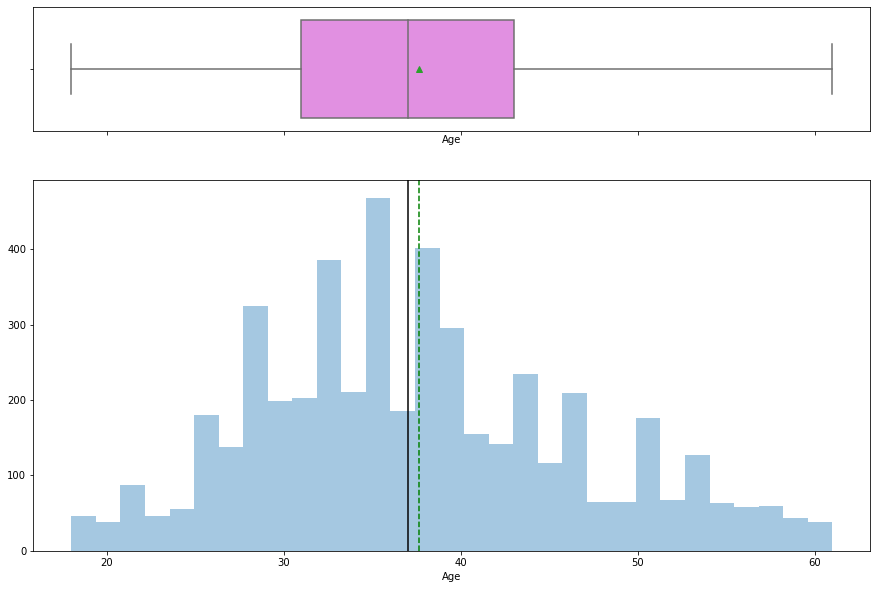

In [30]:
#displaying histograms for continuous variables
histogram_boxplot(df['Age'])

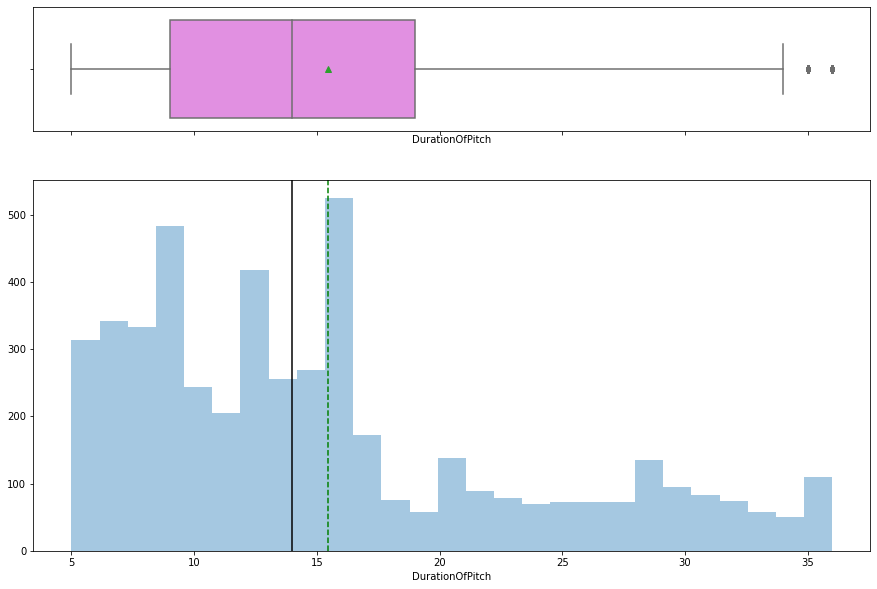

In [31]:
histogram_boxplot(df['DurationOfPitch'])

Duration of Pitch has outliers

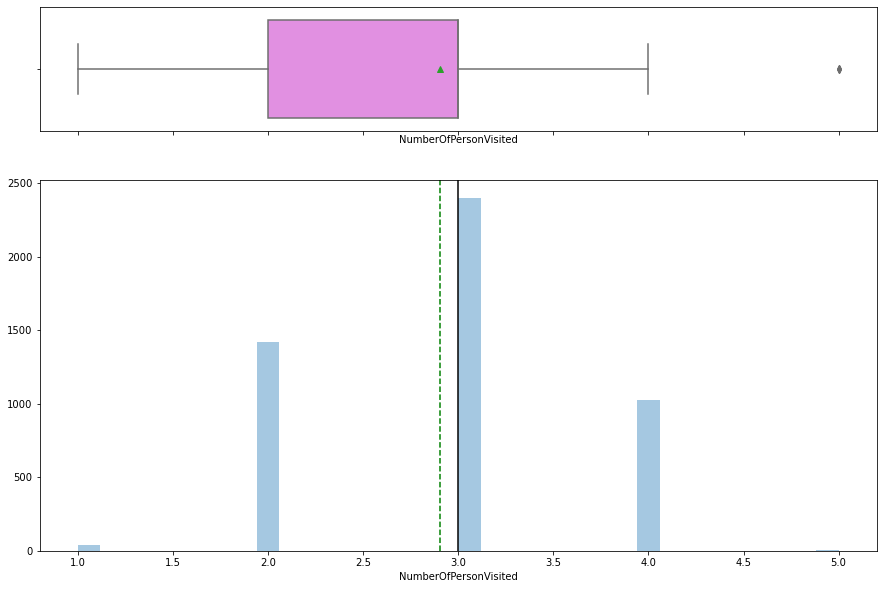

In [32]:
histogram_boxplot(df['NumberOfPersonVisited'])

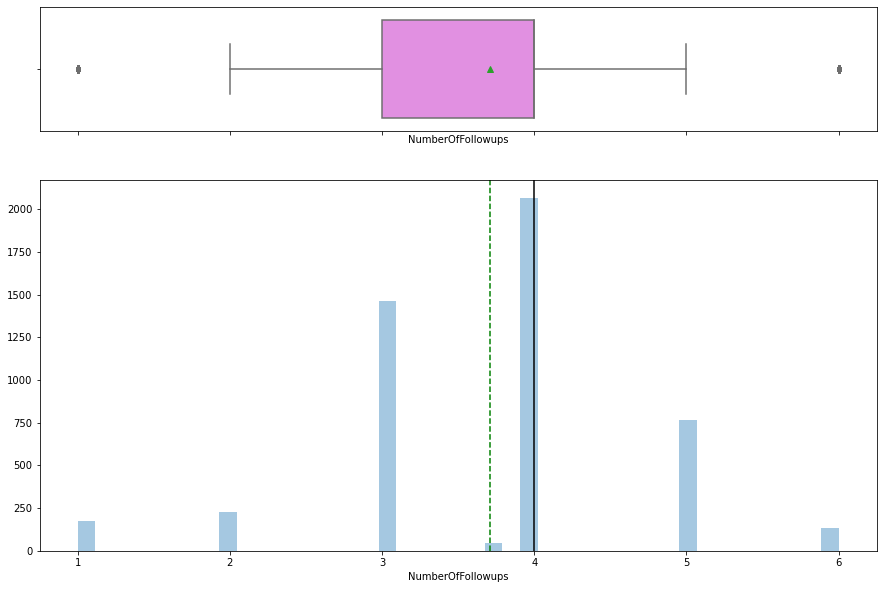

In [33]:
histogram_boxplot(df['NumberOfFollowups'])

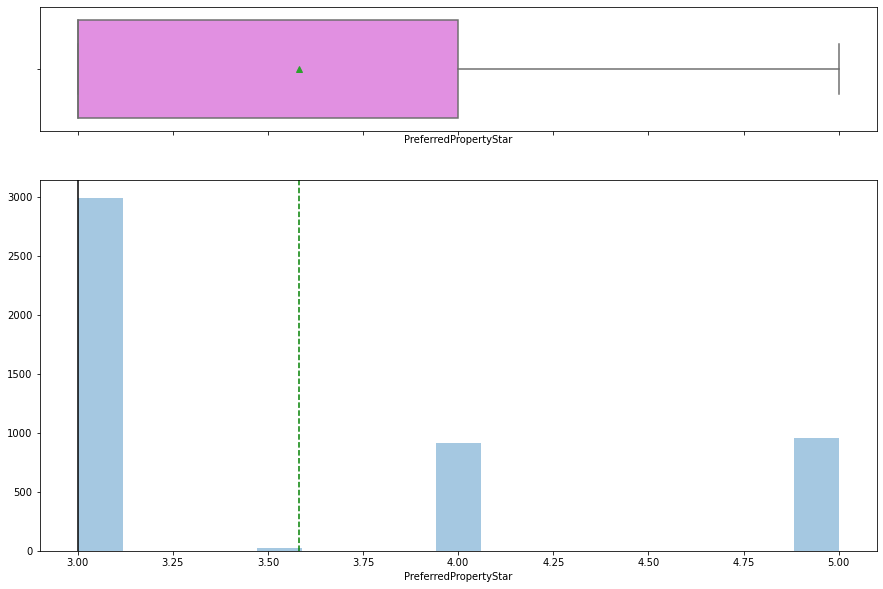

In [34]:
histogram_boxplot(df['PreferredPropertyStar'])

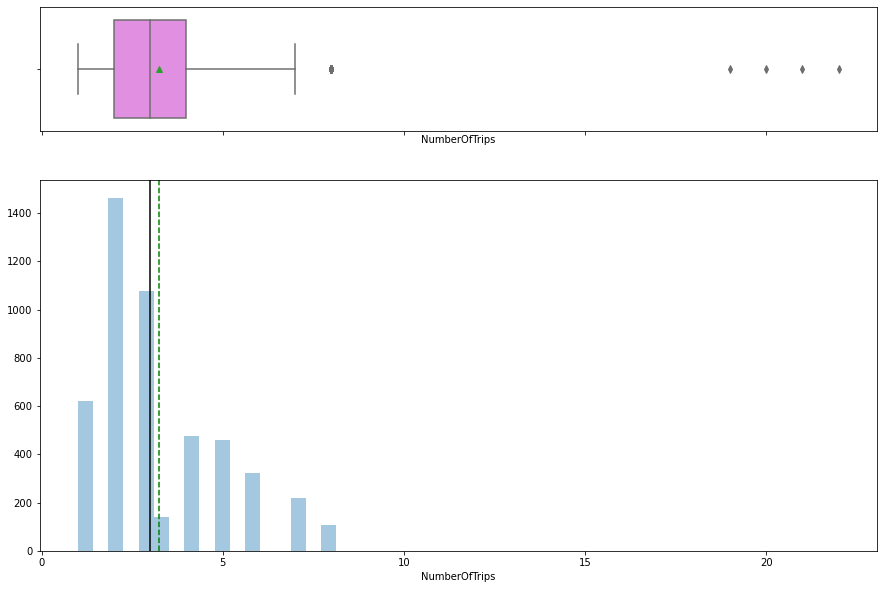

In [35]:
histogram_boxplot(df['NumberOfTrips'])

Number of Trips also has outliers.

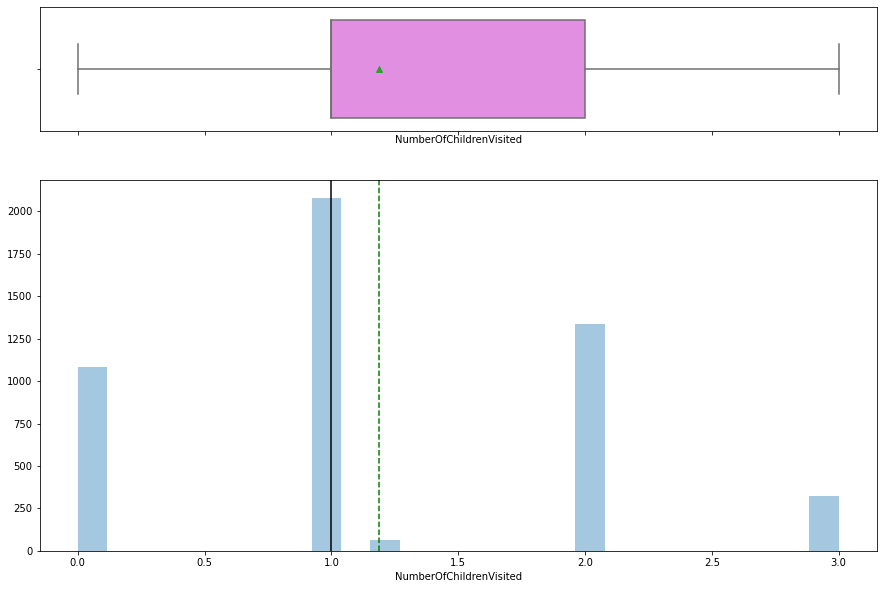

In [36]:
histogram_boxplot(df['NumberOfChildrenVisited'])

In [37]:
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is paassed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(15,7)})
    ax=sns.countplot(x=feature, data=df)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.25 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
        
    plt.show() # show the plot

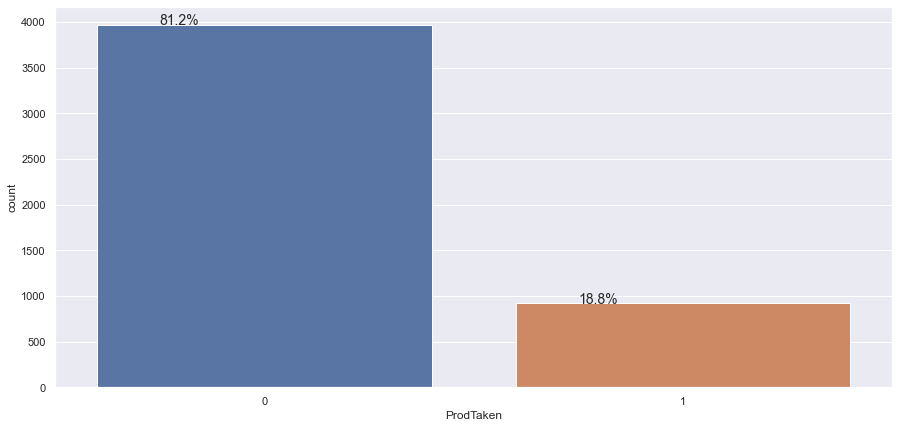

In [38]:
perc_on_bar(df['ProdTaken'])

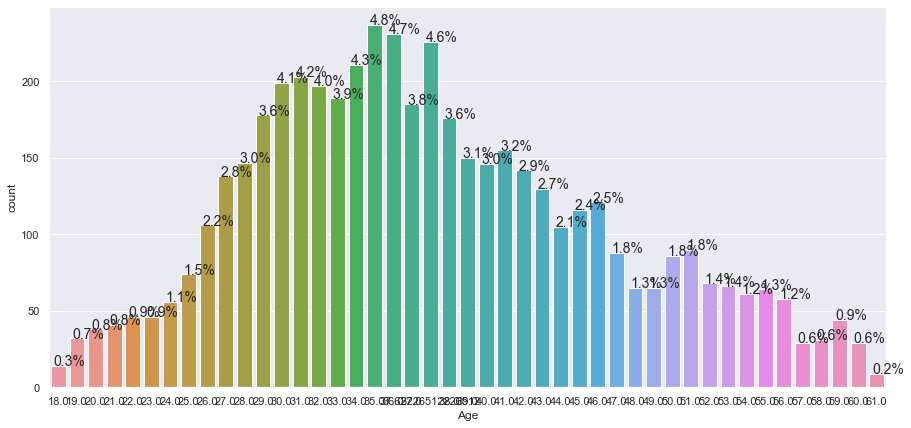

In [39]:
perc_on_bar(df['Age'])

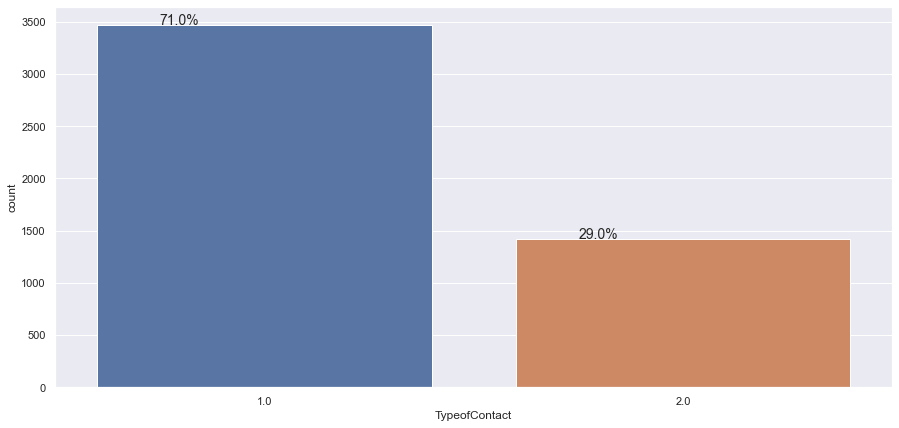

In [40]:
perc_on_bar(df['TypeofContact'])

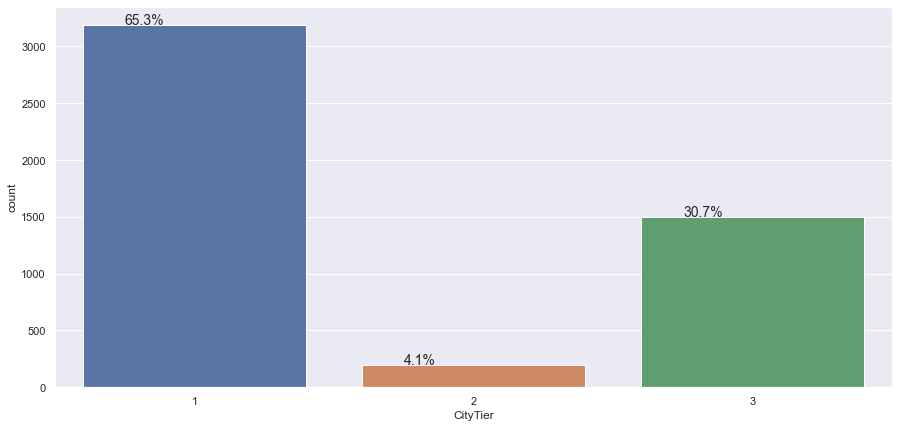

In [41]:
perc_on_bar(df['CityTier'])

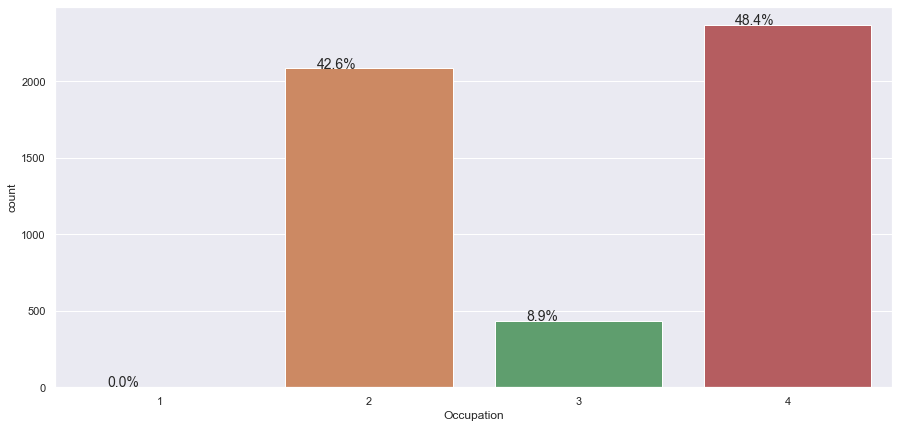

In [42]:
perc_on_bar(df['Occupation'])

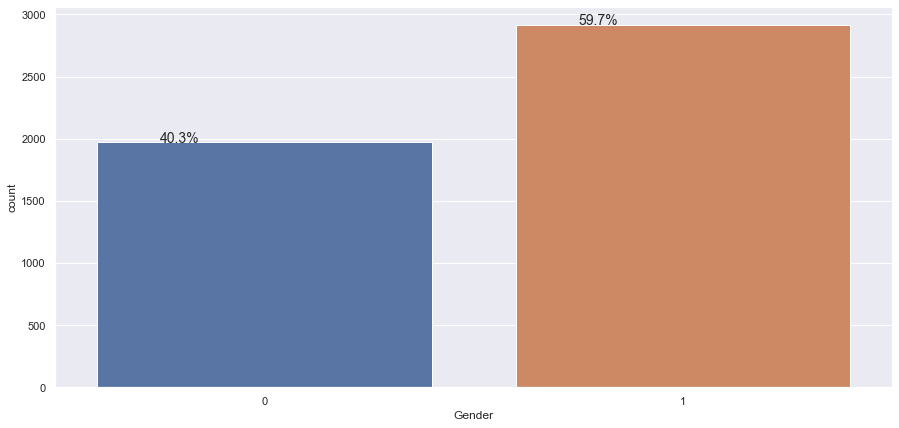

In [43]:
perc_on_bar(df['Gender'])

Majority of the customers are Male around 59.7%

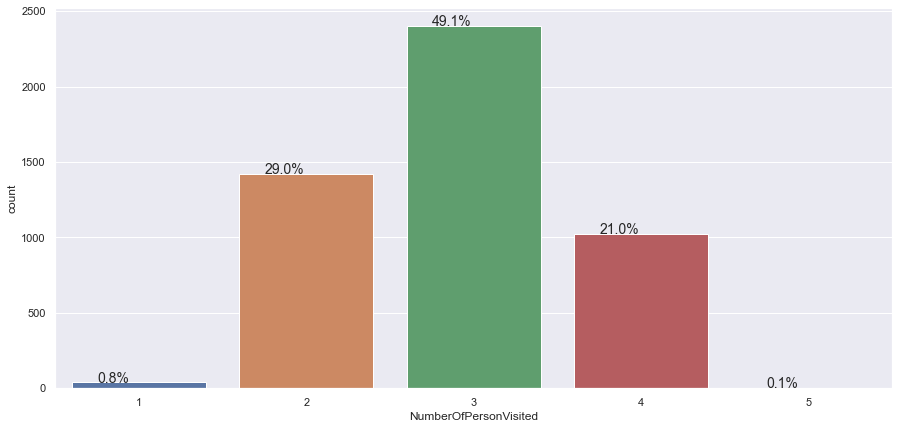

In [44]:
perc_on_bar(df['NumberOfPersonVisited'])

49.1% of customers visited with 3 members followed by 2.

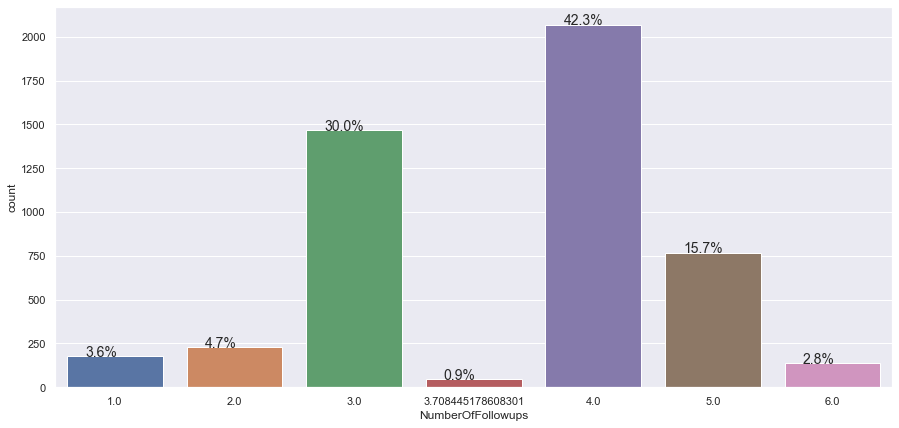

In [45]:
perc_on_bar(df['NumberOfFollowups'])

42% of customers have followed up at least 4 times followed by 30% of customers by 3 times.

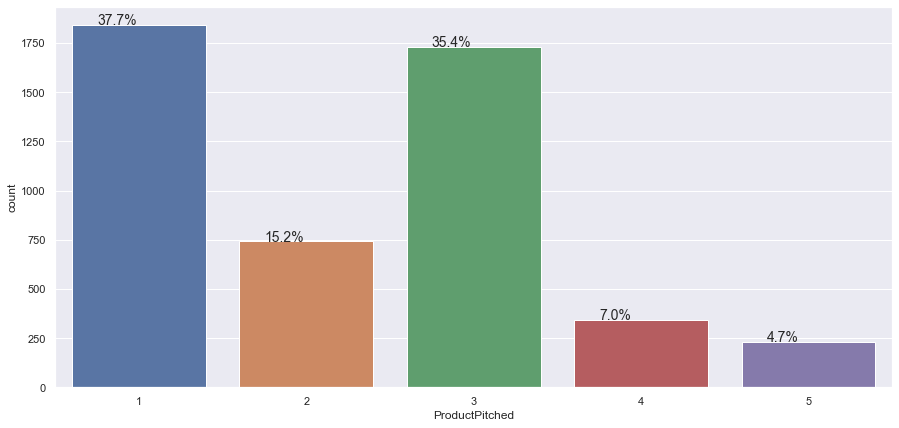

In [46]:
perc_on_bar(df['ProductPitched'])

Basic and Deluxe products were the one that were pitched by the team.

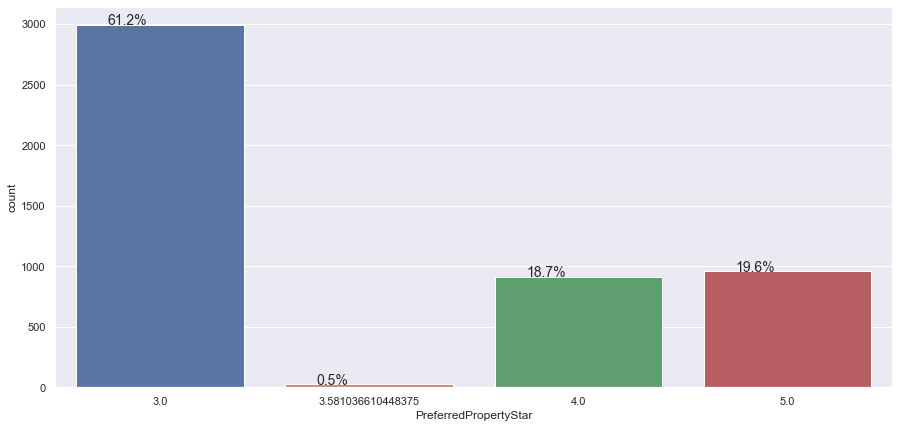

In [47]:
perc_on_bar(df['PreferredPropertyStar'])

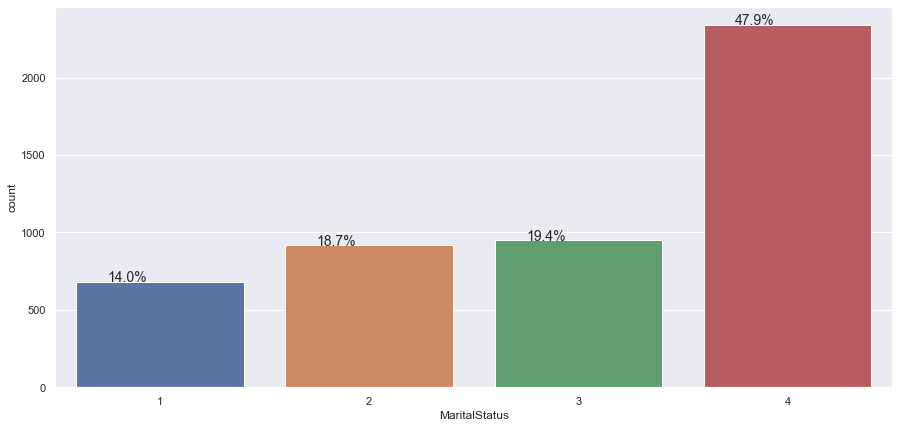

In [48]:
perc_on_bar(df['MaritalStatus'])

Majority of the customers are married.

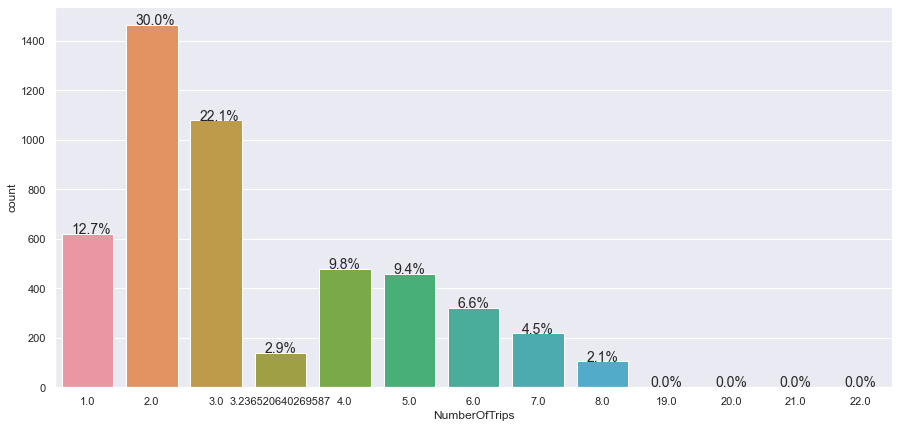

In [49]:
perc_on_bar(df['NumberOfTrips'])

30% of the customers have taken at least 2 trips followed by 22.1% of them taking at least 3 trips.

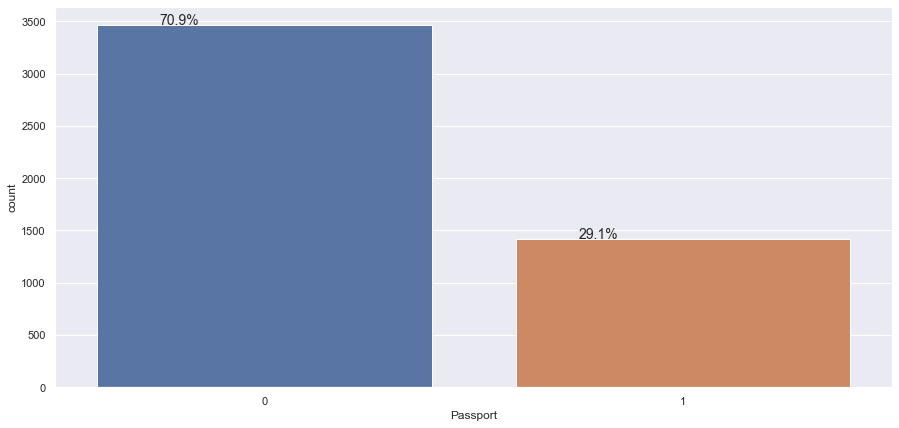

In [51]:
perc_on_bar(df['Passport'])

Only 29.1% customers have passport and majority of them don't have passport.

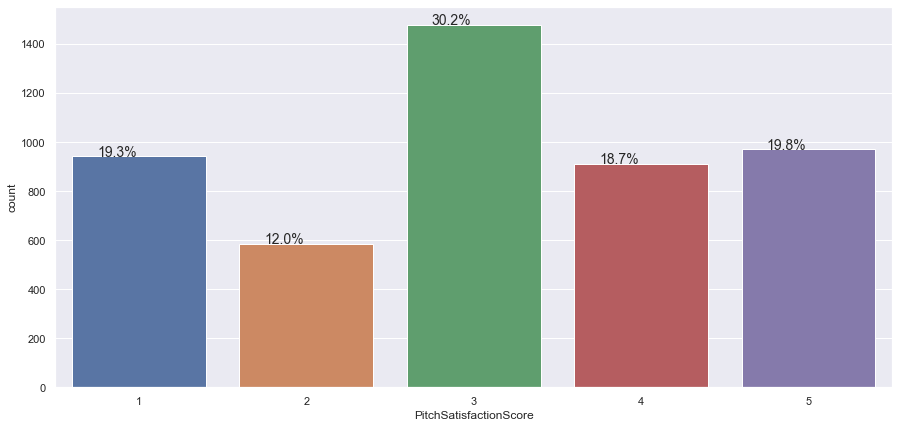

In [52]:
perc_on_bar(df['PitchSatisfactionScore'])

30% of customers have an average 3 pitch satisfaction score.

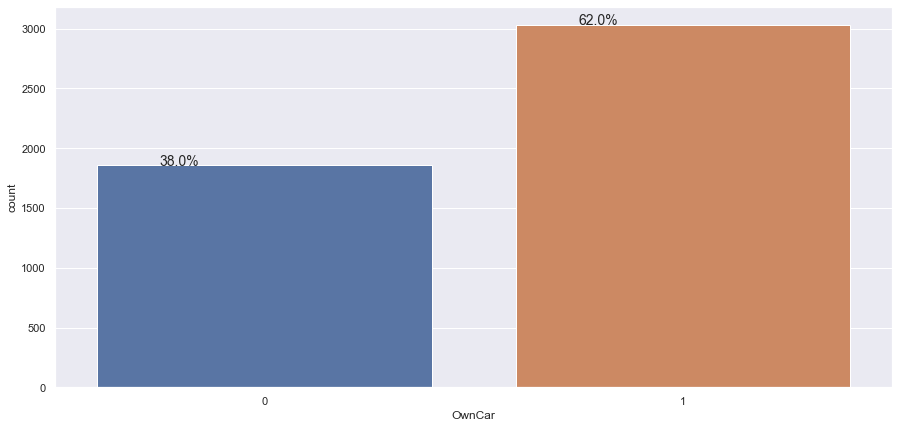

In [53]:
perc_on_bar(df['OwnCar'])

62% of the customers own a car

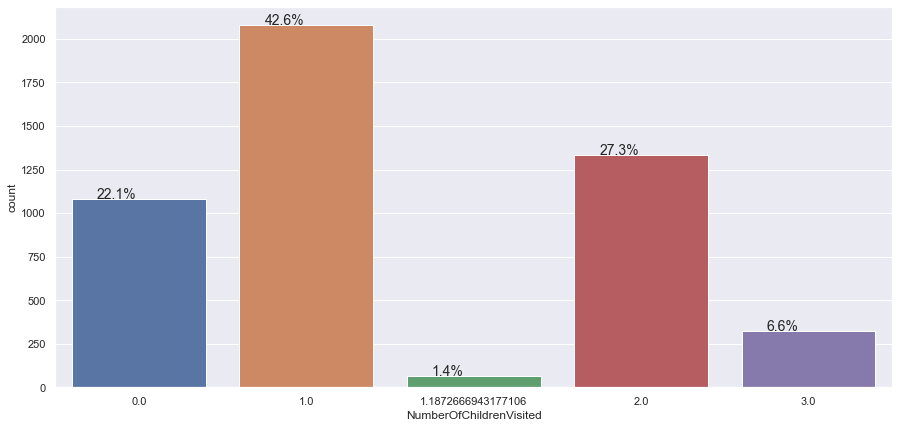

In [54]:
perc_on_bar(df['NumberOfChildrenVisited'])

42.6% of them were accompanied by 1 children

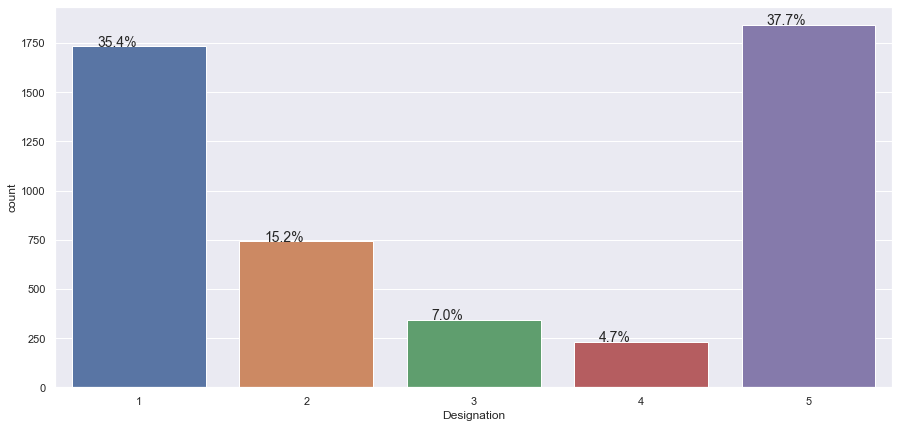

In [55]:
perc_on_bar(df['Designation'])

## <a id = "link5"></a> Bivariate Analysis

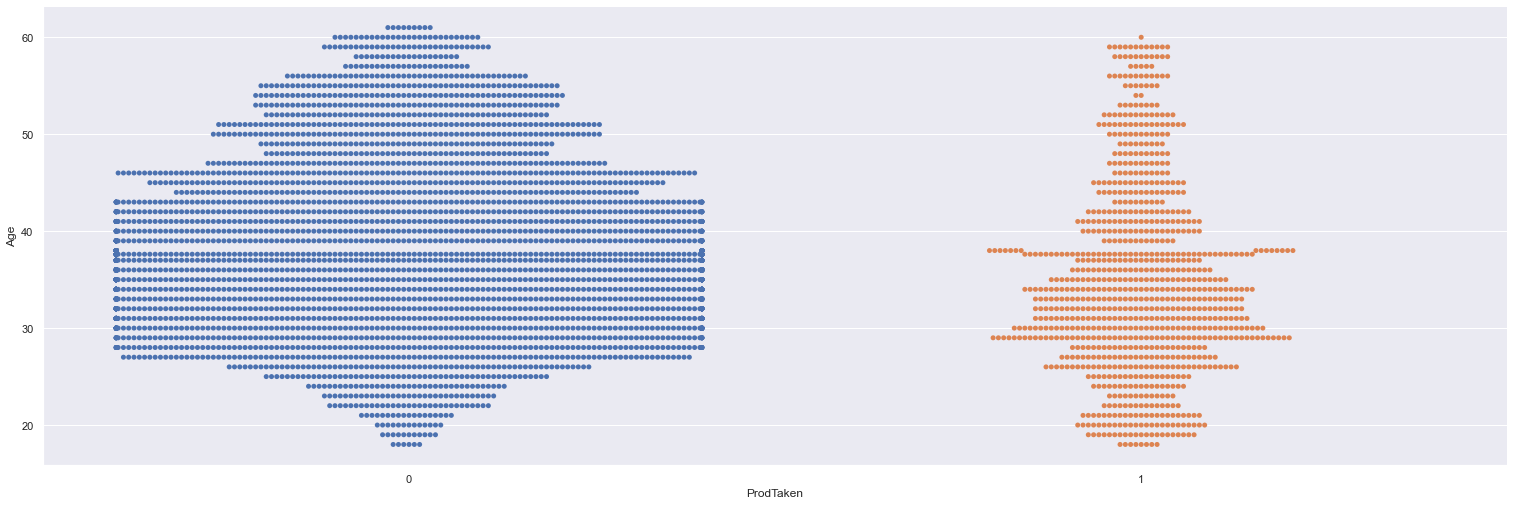

In [56]:
sns.set(rc={'figure.figsize':(21,7)})
sns.catplot(x="ProdTaken", y="Age", kind="swarm", data=df, height=7, aspect=3);

Wall time: 29 ms


<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

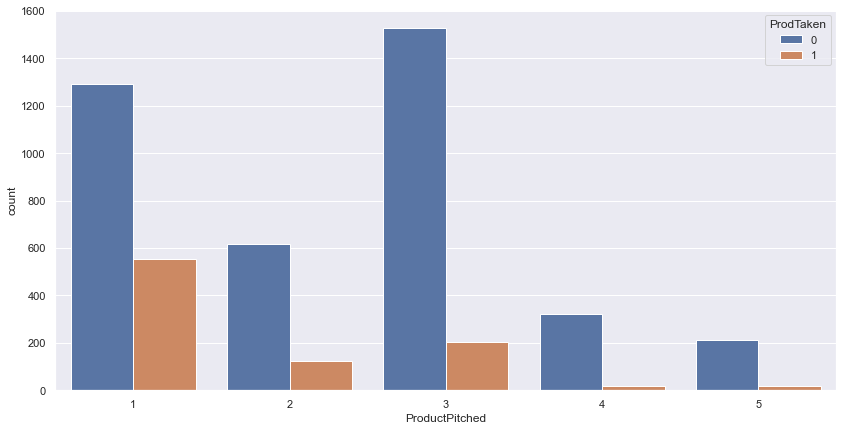

In [57]:
%%time
# Countplot 
plt.figure(figsize = (14 , 7))
sns.countplot(x = 'ProductPitched', hue ='ProdTaken', data = df)

Wall time: 185 ms


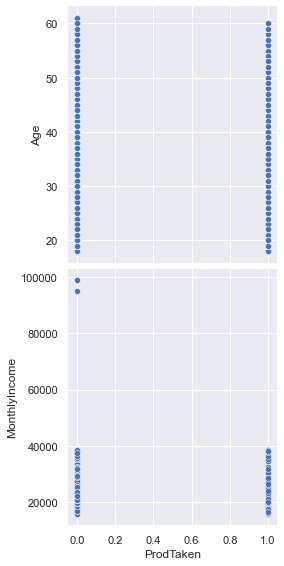

In [58]:
%%time
sns.pairplot(
    df,
    x_vars=["ProdTaken"],
    y_vars=["Age", "MonthlyIncome"],
    height=4,
    aspect=1
    );

Among those who have taken the product, monthly income is between ~20K to 40K.

Wall time: 32 ms


<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

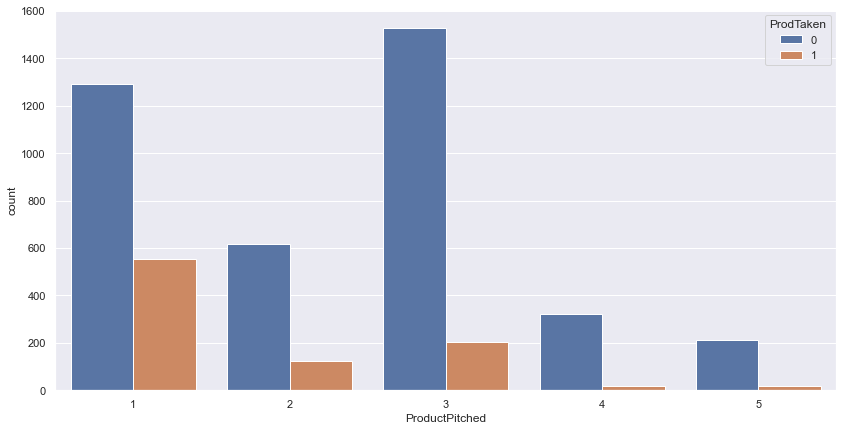

In [59]:
%%time
# Countplot 
plt.figure(figsize = (14 , 7))
sns.countplot(x = 'ProductPitched', hue ='ProdTaken', data = df)

In [60]:
#crosstab
pd.crosstab([df.ProductPitched], df.ProdTaken)

ProdTaken          0    1
ProductPitched           
1               1290  552
2                618  124
3               1528  204
4                322   20
5                210   20

Wall time: 94 ms


<AxesSubplot:xlabel='DurationOfPitch', ylabel='count'>

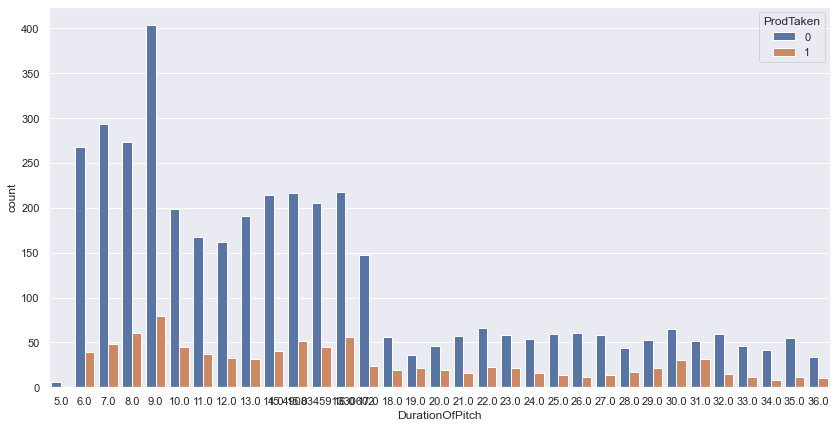

In [61]:
%%time
# Countplot 
plt.figure(figsize = (14 , 7))
sns.countplot(x = 'DurationOfPitch', hue ='ProdTaken', data = df)

In [62]:
#crosstab
pd.crosstab([df.Occupation, df.ProductPitched], df.ProdTaken)

ProdTaken                    0    1
Occupation ProductPitched          
1          1                 0    2
2          1               518  202
           2               262   58
           3               682  108
           4               146    4
           5                92   12
3          1               108   88
           2                72   12
           3               108   16
           4                18    0
           5                 8    4
4          1               664  260
           2               284   54
           3               738   80
           4               158   16
           5               110    4

In [63]:
#crosstab
pd.crosstab([df.Gender, df.ProductPitched], df.ProdTaken)

ProdTaken                0    1
Gender ProductPitched          
0      1               472  208
       2               278   48
       3               654   70
       4               156    4
       5                70   12
1      1               818  344
       2               340   76
       3               874  134
       4               166   16
       5               140    8

In [64]:
df.groupby(['ProductPitched','ProdTaken'])['Age'].mean()

ProductPitched  ProdTaken
1               0            34.137661
                1            31.713811
2               0            40.496764
                1            40.980825
3               0            37.360386
                1            37.640851
4               0            48.307453
                1            43.500000
5               0            47.985714
                1            48.900000
Name: Age, dtype: float64

**CustomerProfile**

- Mostly Female Customers with an average age of 37.5 years, salaried customers with an average income of 20,000 dollars have bought **basic** package.

- Slightly more Female Customers with an average age of 41 years, Small business as occupation with an average income of 26,000 dollars have bought **standard** package.

- Customers (more Female customers) with an average age of 37 years, a mix of small business and salaried customers with an average income of 23,000 dollars have bought **Deluxe** package.

- Customers with an average age of 43 years mostly male customers with an average income between 29K to 33K bought **Super Deluxe** package.

- Customers with an average age of 48 years with an average income between 33K - 36K bought **King** packge.
 

In [65]:
df.groupby(['ProductPitched','Occupation','ProdTaken'])['MonthlyIncome'].mean()

ProductPitched  Occupation  ProdTaken
1               1           1            18929.000000
                2           0            19990.216535
                            1            20277.284101
                3           0            19926.273708
                            1            20252.019398
                4           0            20081.048039
                            1            20356.378980
2               2           0            26758.702290
                            1            26172.551724
                3           0            27291.611111
                            1            25030.500000
                4           0            26623.387324
                            1            26111.444444
3               2           0            22715.816985
                            1            23009.727412
                3           0            22487.967916
                            1            21892.053343
                4           0            227

Among the basic package pitched, a majority of them (235) of them have taken the product and those customers have been followed up by 4 times.

Among the Deluxe package pitched, a majority of them (78) of them have taken the product and those customers have been followed up by 4 times.

Among the King package pitched, a majority of them (94) of them have taken the product and those customers have been followed up by 4 times.

Generally it appears that it takes 4 follow-ups with the customer inorder to sell the product.

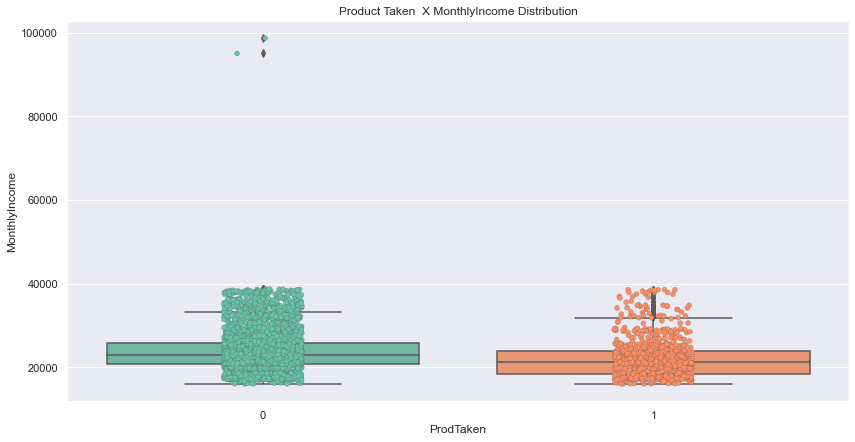

In [66]:
# Distribution by Income
plt.figure(figsize = (14 , 7))
ax = sns.boxplot(x = 'ProdTaken', y = 'MonthlyIncome', palette = 'Set2', data = df)
ax = sns.stripplot(x = 'ProdTaken', y = 'MonthlyIncome', palette = 'Set2', data = df, 
               linewidth = 0.2)
ax.set_title('Product Taken  X MonthlyIncome Distribution')
plt.show()

Among those who has taken the product, it appears that the monthly income range is between ~18K to ~35K

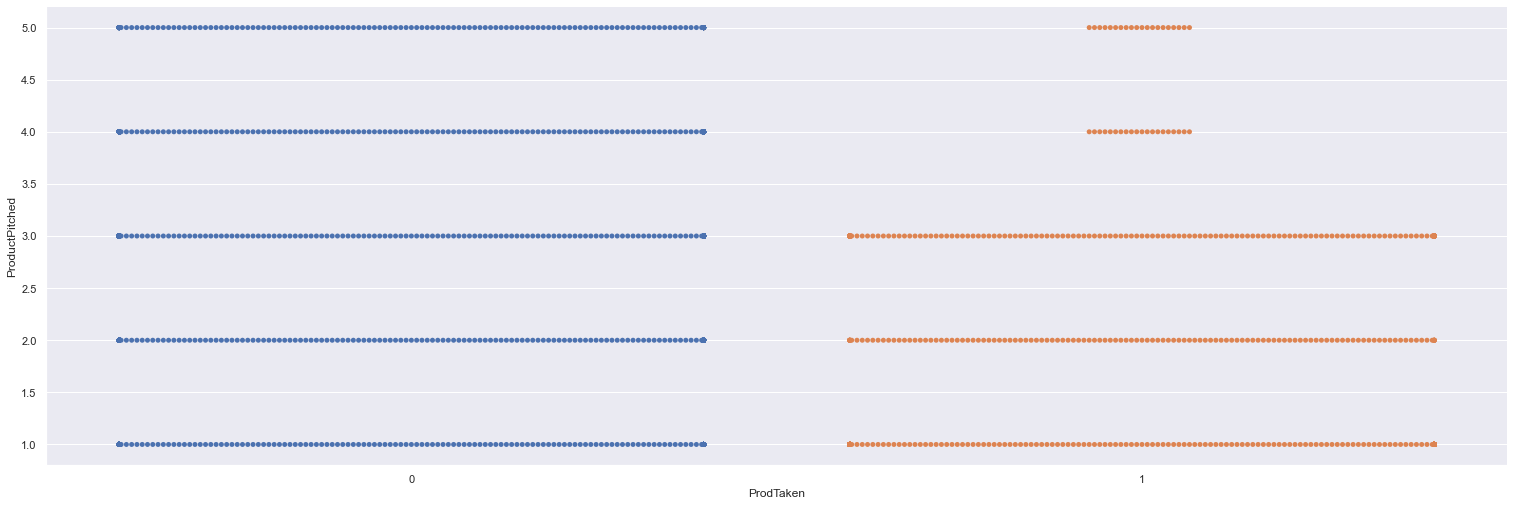

In [67]:
sns.set(rc={'figure.figsize':(21,7)})
sns.catplot(x="ProdTaken", y="ProductPitched", kind="swarm", data=df, height=7, aspect=3);

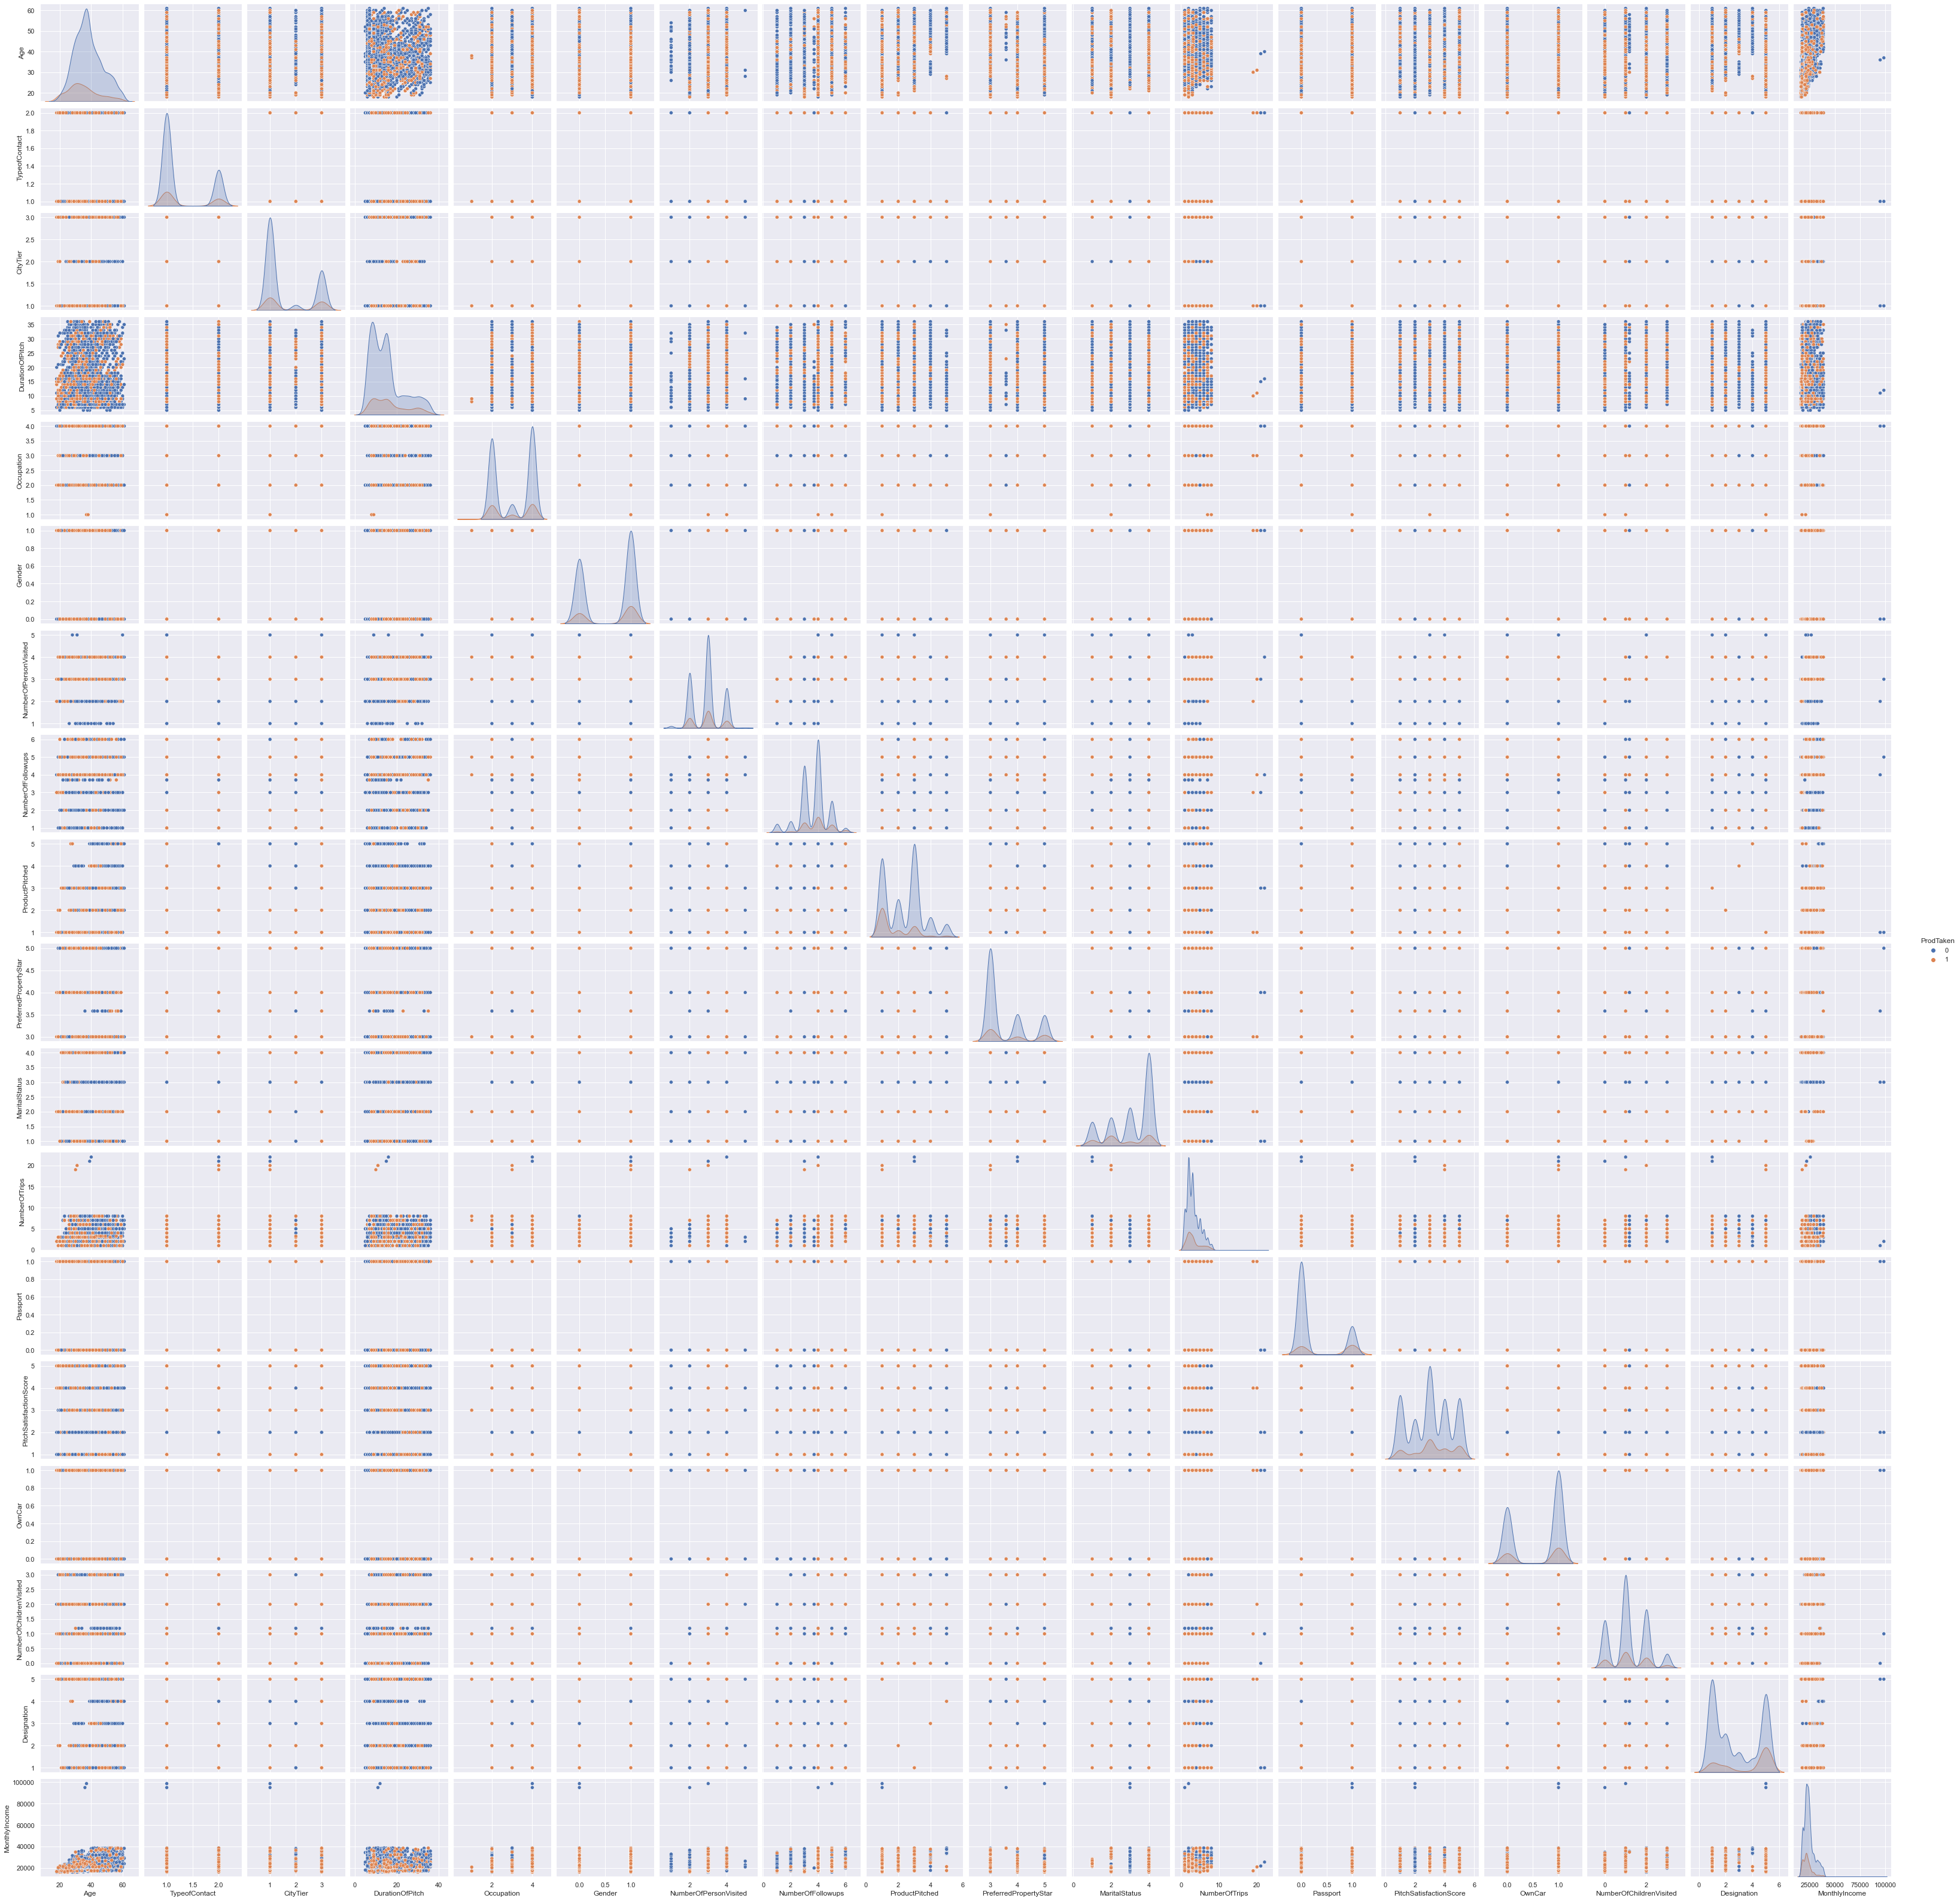

In [68]:
#Displaying a pairplot
pp=df
sns.pairplot(df, hue = 'ProdTaken')

**Customer Profile**

- Customer age who has taken a product seems to be between ~25 and 40

- Monthly Income is betwen ~18K to 40K per month

- Among the basic package pitched, a majority of them (235) of them have taken the product and those customers have been followed up by 4 times.

- Among the Deluxe package pitched, a majority of them (78) of them have taken the product and those customers have been followed up by 4 times.

- Among the King package pitched, a majority of them (94) of them have taken the product and those customers have been followed up by 4 times.

- Generally it appears that it takes 4 follow-ups with the customer inorder to sell the product.

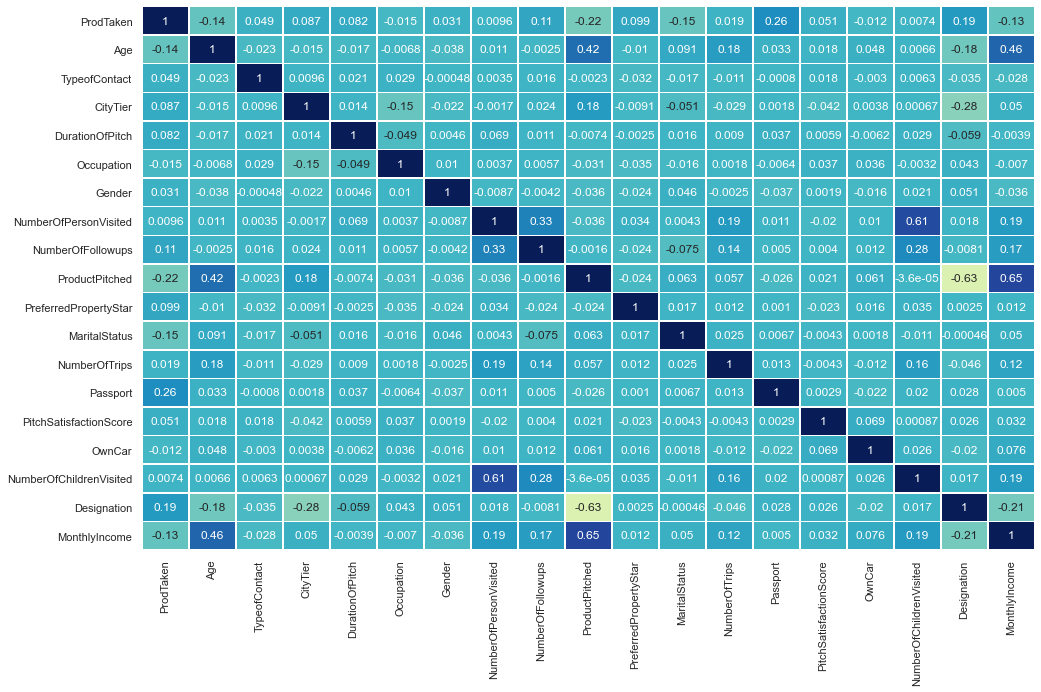

In [69]:
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

In [70]:
#Finding variables that has more than 0.6 corr coefficient
c2 = df.drop('ProdTaken', axis = 1).corr()
a = c2.abs().unstack()
a = a.sort_values(kind = "quicksort", ascending = False)
a[(a > 0.6) & (a < 1)]


MonthlyIncome            ProductPitched             0.645003
ProductPitched           MonthlyIncome              0.645003
                         Designation                0.632109
Designation              ProductPitched             0.632109
NumberOfPersonVisited    NumberOfChildrenVisited    0.607215
NumberOfChildrenVisited  NumberOfPersonVisited      0.607215
dtype: float64

Number of Children, MonthlyIncome, ProductPitched,Designation, NumberOfChildrenVisited and NumberOfPersonVisited seems to have positive correlation.

In [71]:
print(df.ProdTaken.value_counts())

0    3968
1     920
Name: ProdTaken, dtype: int64


A total of 920 customers out of 4888 have taken the product (~18.8%)

## <a id = "link6"></a> Split the dataset

In [72]:
# Separating features and the target column
X = df.drop('ProdTaken', axis=1)
y = df['ProdTaken']

In [77]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,shuffle=True)

In [78]:
X_train.shape, X_test.shape

((3421, 18), (1467, 18))

We have 3421 observations in the training set and 1467 in the testing set.

## <a id = "link7"></a> Building Models

In [79]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [80]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [81]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

## <a id = "link8"></a> Decision Tree

In [82]:
#We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [83]:
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.9161554192229039


In [84]:
y.sum(axis = 0)

920

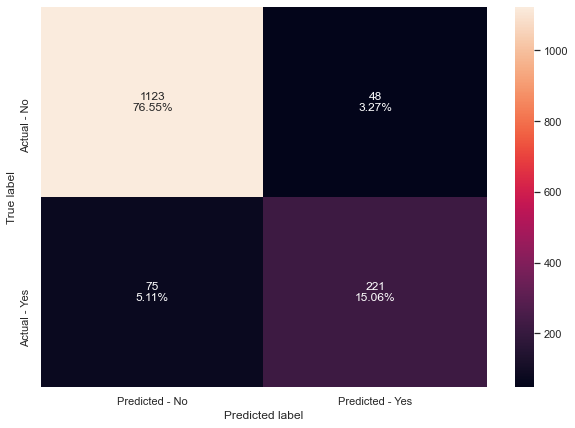

In [85]:
make_confusion_matrix(dTree,y_test)

In [86]:
# Recall on train and test
get_recall_score(dTree)

Recall on training set :  1.0
Recall on test set :  0.7466216216216216


We will use recall metrics to calculate true positives to actual positives. High recall implies false low negatives. 

In [87]:
feature_names = list(X.columns)
print(feature_names)

['Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisited', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome']


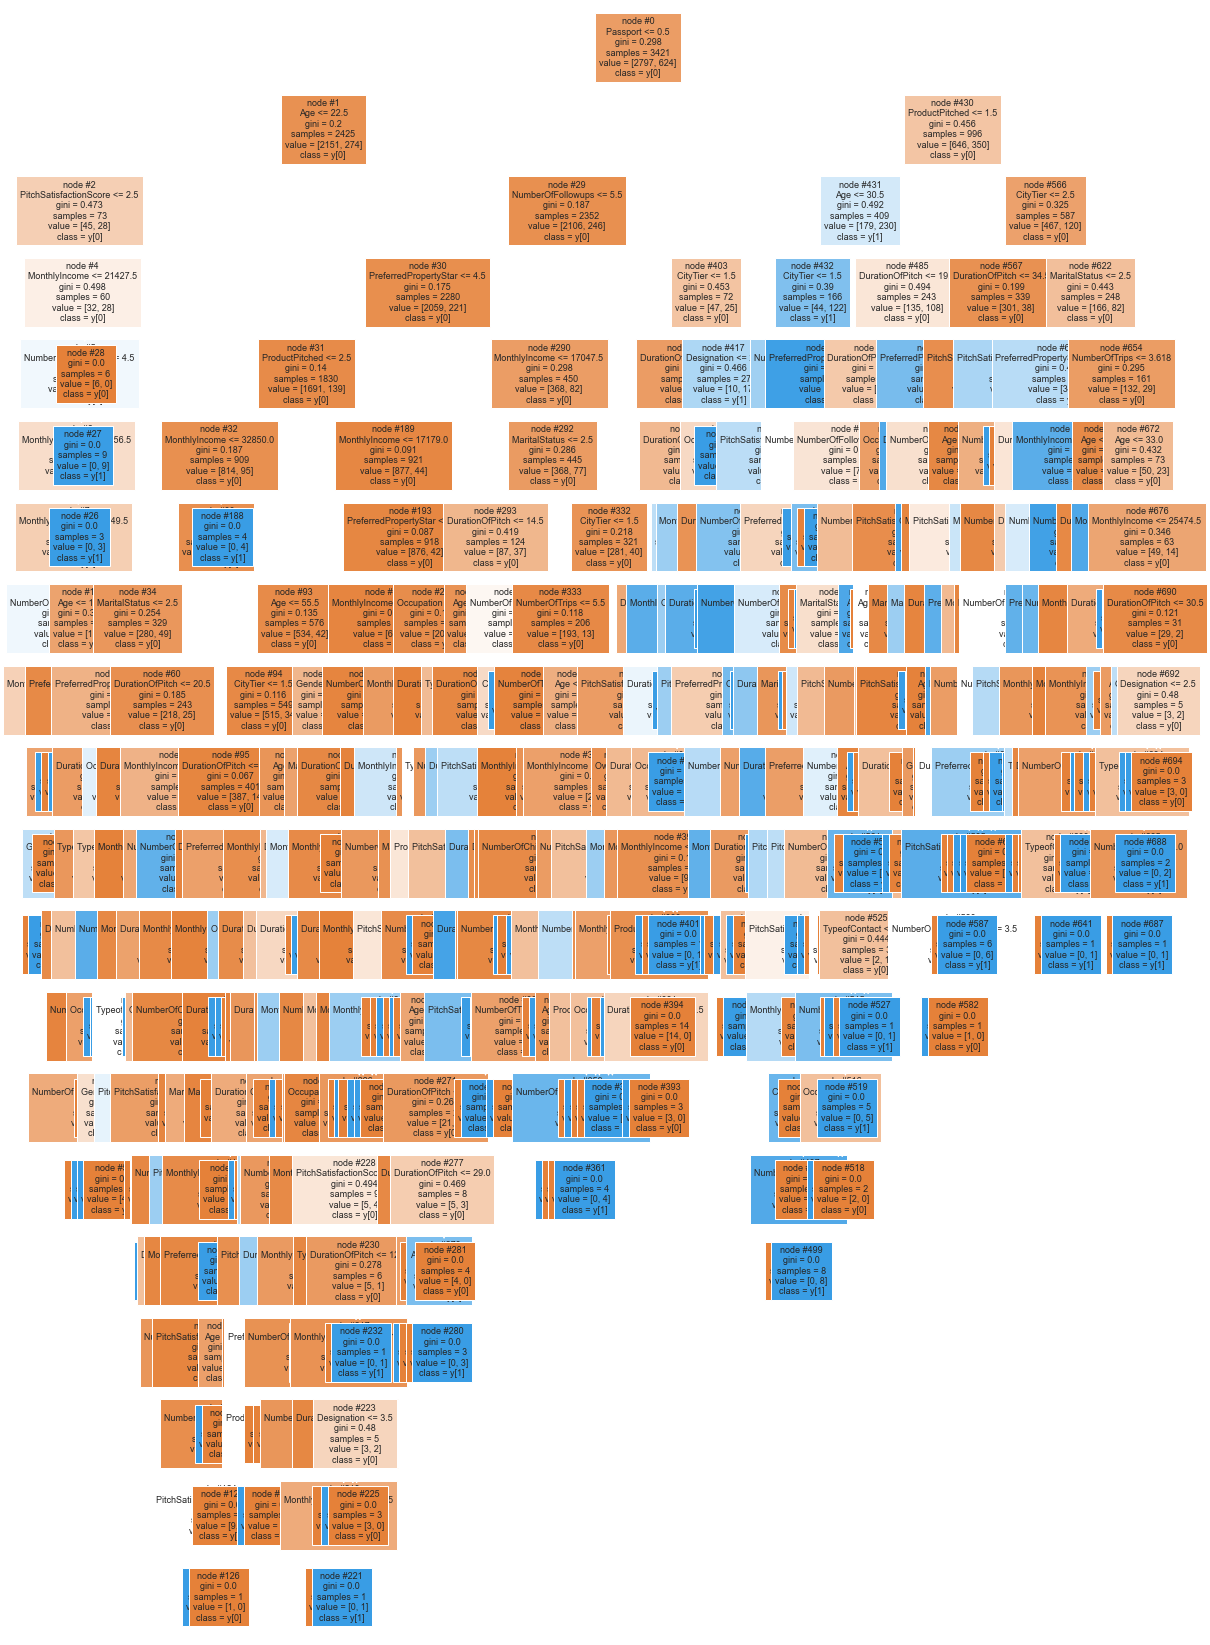

In [88]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [89]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

|--- Passport <= 0.50
|   |--- Age <= 22.50
|   |   |--- PitchSatisfactionScore <= 2.50
|   |   |   |--- weights: [13.00, 0.00] class: 0
|   |   |--- PitchSatisfactionScore >  2.50
|   |   |   |--- MonthlyIncome <= 21427.50
|   |   |   |   |--- NumberOfFollowups <= 4.50
|   |   |   |   |   |--- MonthlyIncome <= 21356.50
|   |   |   |   |   |   |--- MonthlyIncome <= 17749.50
|   |   |   |   |   |   |   |--- NumberOfFollowups <= 3.50
|   |   |   |   |   |   |   |   |--- MonthlyIncome <= 17685.50
|   |   |   |   |   |   |   |   |   |--- Age <= 18.50
|   |   |   |   |   |   |   |   |   |   |--- Gender <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- Gender >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 3.00] class: 1
|   |   |   |   |   |   |   |   |   |--- Age >  18.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [9.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- 

In [90]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                              Imp
DurationOfPitch          0.139178
Age                      0.132612
MonthlyIncome            0.111143
PitchSatisfactionScore   0.082338
Passport                 0.078662
ProductPitched           0.074953
NumberOfTrips            0.060348
NumberOfFollowups        0.051619
MaritalStatus            0.049104
PreferredPropertyStar    0.045062
CityTier                 0.041278
Occupation               0.031481
Gender                   0.026865
TypeofContact            0.024725
NumberOfChildrenVisited  0.017052
Designation              0.016103
OwnCar                   0.010791
NumberOfPersonVisited    0.006683


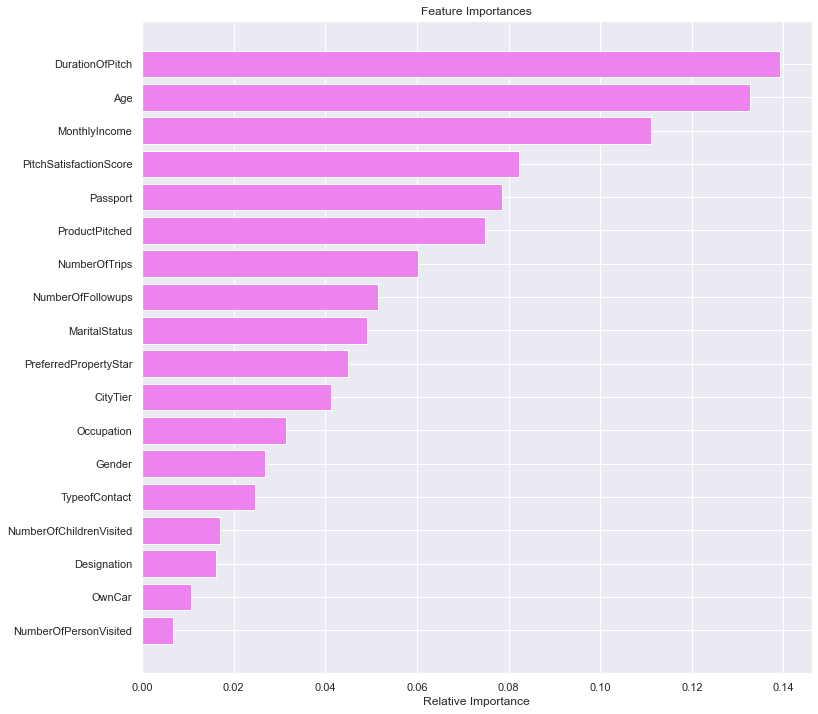

In [91]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

According to the decision tree model, Duration of Pitch, Age and Monthly Income are the most important ones. Since the tree is complex it can be construed that the tree often overfits.

In [92]:
#Limiting the tree to max depth of 3

In [93]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

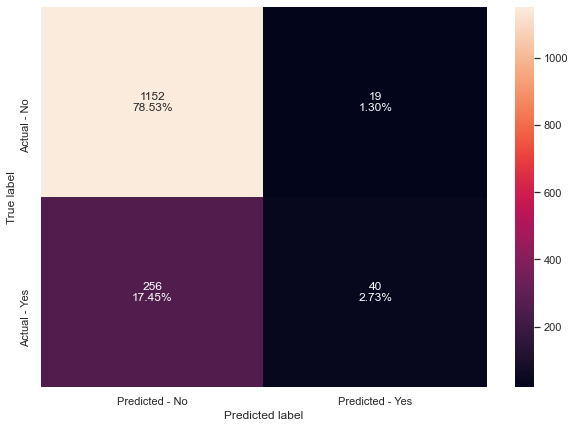

In [94]:
make_confusion_matrix(dTree1, y_test)

In [95]:
# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(X_train, y_train))
print("Accuracy on test set : ",dTree1.score(X_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.8403975445776088
Accuracy on test set :  0.8125426039536469
Recall on training set :  0.1955128205128205
Recall on test set :  0.13513513513513514


Recall reduced from 1 to 0.17 in the training set and although the value is less, the tree is not overfitting and we have a generalized model.

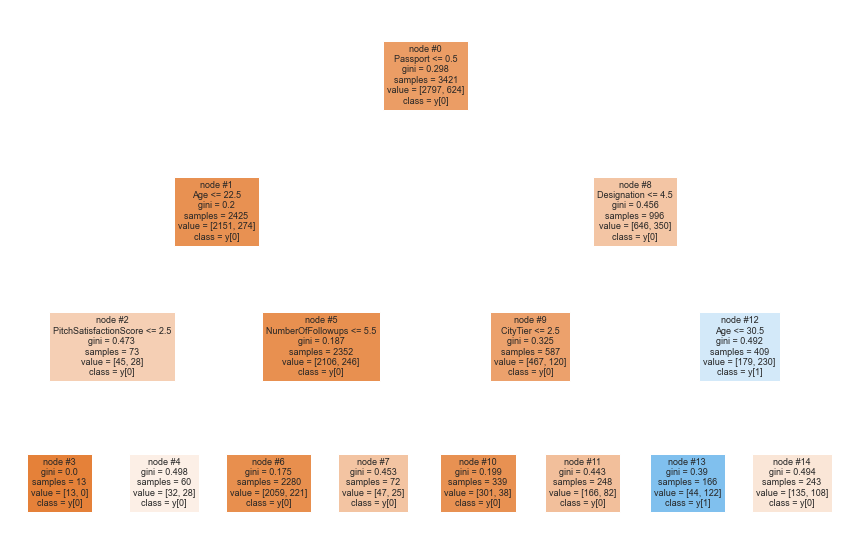

In [96]:
plt.figure(figsize=(15,10))

tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [97]:
print(tree.export_text(dTree1,feature_names=feature_names,show_weights=True))

|--- Passport <= 0.50
|   |--- Age <= 22.50
|   |   |--- PitchSatisfactionScore <= 2.50
|   |   |   |--- weights: [13.00, 0.00] class: 0
|   |   |--- PitchSatisfactionScore >  2.50
|   |   |   |--- weights: [32.00, 28.00] class: 0
|   |--- Age >  22.50
|   |   |--- NumberOfFollowups <= 5.50
|   |   |   |--- weights: [2059.00, 221.00] class: 0
|   |   |--- NumberOfFollowups >  5.50
|   |   |   |--- weights: [47.00, 25.00] class: 0
|--- Passport >  0.50
|   |--- Designation <= 4.50
|   |   |--- CityTier <= 2.50
|   |   |   |--- weights: [301.00, 38.00] class: 0
|   |   |--- CityTier >  2.50
|   |   |   |--- weights: [166.00, 82.00] class: 0
|   |--- Designation >  4.50
|   |   |--- Age <= 30.50
|   |   |   |--- weights: [44.00, 122.00] class: 1
|   |   |--- Age >  30.50
|   |   |   |--- weights: [135.00, 108.00] class: 0



In [98]:
print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                              Imp
Passport                 0.407908
Designation              0.313864
Age                      0.140601
CityTier                 0.069533
NumberOfFollowups        0.044443
PitchSatisfactionScore   0.023651
MaritalStatus            0.000000
NumberOfChildrenVisited  0.000000
OwnCar                   0.000000
NumberOfTrips            0.000000
PreferredPropertyStar    0.000000
TypeofContact            0.000000
ProductPitched           0.000000
NumberOfPersonVisited    0.000000
Gender                   0.000000
Occupation               0.000000
DurationOfPitch          0.000000
MonthlyIncome            0.000000


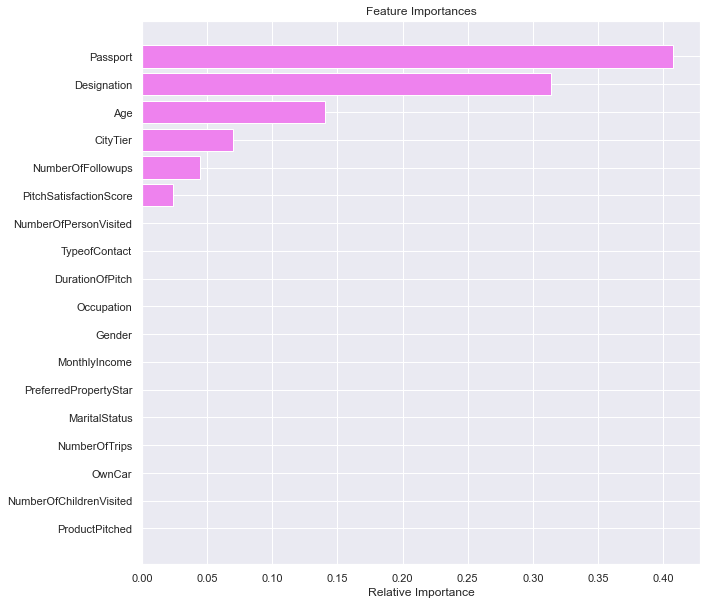

In [99]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Earlier Duration of Pitch was on top of the model but after limiting the depth to 3, we have Passport and Designation and Marital status becomes important features.

We will use hyperparameter tuning to tune the decision tree model.

In [100]:
#using gridsearch
from sklearn.model_selection import GridSearchCV

In [101]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10] + [None],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_impurity_decrease=0.001, random_state=1)

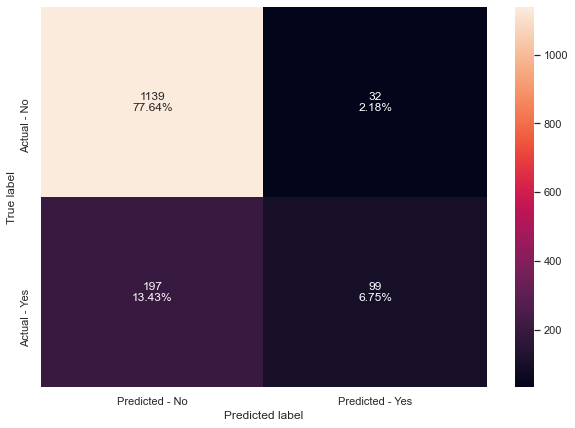

In [102]:
make_confusion_matrix(estimator,y_test)

In [103]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))
# Recall on train and test
get_recall_score(estimator)

Accuracy on training set :  0.8854136217480268
Accuracy on test set :  0.8438991138377642
Recall on training set :  0.46153846153846156
Recall on test set :  0.3344594594594595


Recall has improved on both training and test dataset after hyperparameter tuning.

## <a id = "link9"></a> Bagging Classifier

In [104]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [105]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.994153756211634
Accuracy on test set :  0.9059304703476483
Recall on training set :  0.969551282051282
Recall on test set :  0.5912162162162162
Precision on training set :  0.9983498349834984
Precision on test set :  0.9114583333333334


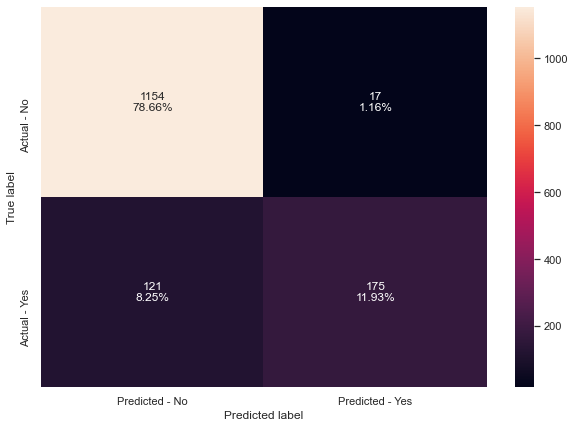

In [106]:
make_confusion_matrix(bagging_estimator,y_test)

In [107]:
#hyperparameter tuning - Bagging Classifier

# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

In [108]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_tuned_score=get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.9222903885480572
Recall on training set :  0.9983974358974359
Recall on test set :  0.652027027027027
Precision on training set :  1.0
Precision on test set :  0.946078431372549


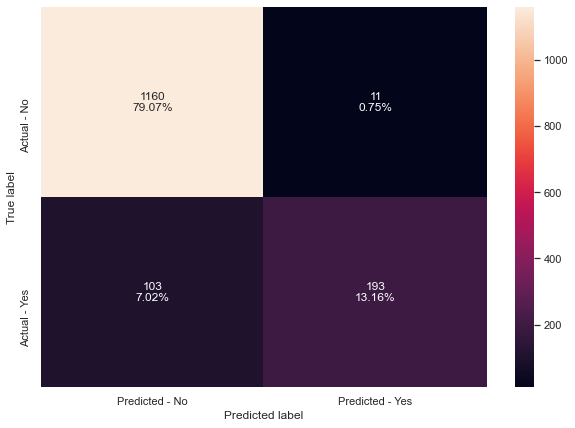

In [109]:
make_confusion_matrix(bagging_estimator_tuned,y_test)

Accuracy on trainiang set increased but on test set it decreased. The model is overfitting the data in my opinion.

In [110]:
#Using Logistic Regression as base estimator
bagging_lr=BaggingClassifier(base_estimator=LogisticRegression(random_state=1),random_state=1)
bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(random_state=1),
                  random_state=1)

In [111]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_lr_score=get_metrics_score(bagging_lr)

Accuracy on training set :  0.8336743642209881
Accuracy on test set :  0.8152692569870484
Recall on training set :  0.14423076923076922
Recall on test set :  0.13175675675675674
Precision on training set :  0.72
Precision on test set :  0.7358490566037735


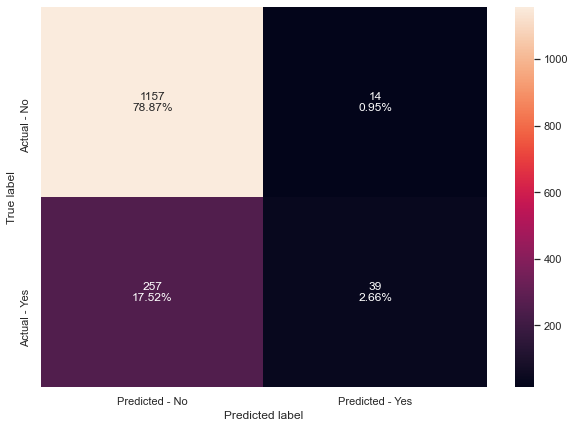

In [112]:
make_confusion_matrix(bagging_lr,y_test)

Bagging classifier with logistic regression as base_estimator is not overfitting the data but the test recall is very low. It gets really difficult to interpret without feature importance attribute.

## <a id = "link10"></a> Random Forest Classifier

In [113]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [114]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9120654396728016
Recall on training set :  1.0
Recall on test set :  0.6013513513513513
Precision on training set :  1.0
Precision on test set :  0.9417989417989417


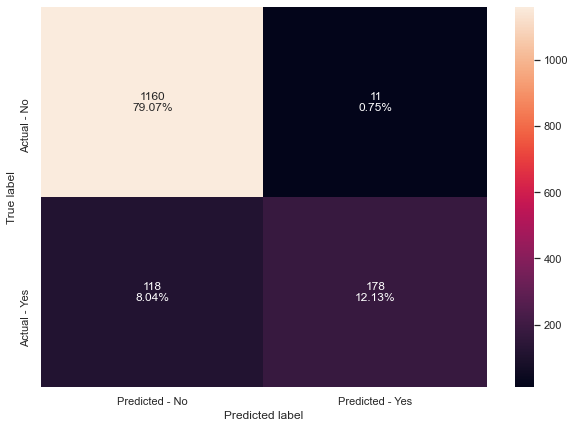

In [115]:
make_confusion_matrix(rf_estimator,y_test)

With default parameters:

Both models - Bagging classifiers as well as random forest classifier are overfitting the train data. Both models are giving similar performance in terms of accuracy but bagging classifier is giving better recall.

In [116]:
#tuning Random Forest classifier

In [117]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.6000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=5,
                       n_estimators=200, random_state=1)

In [118]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_tuned_score=get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.9222449576147326
Accuracy on test set :  0.8568507157464212
Recall on training set :  0.6089743589743589
Recall on test set :  0.36486486486486486
Precision on training set :  0.945273631840796
Precision on test set :  0.8307692307692308


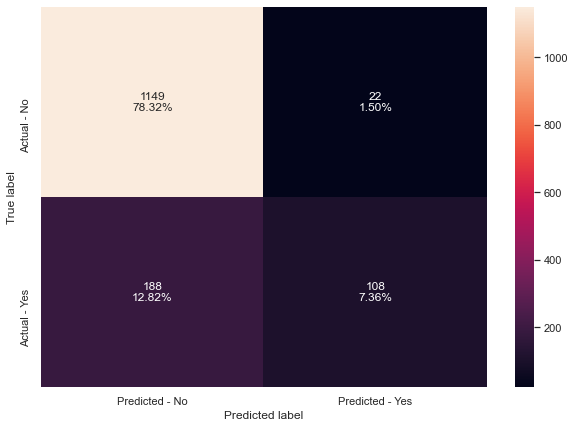

In [119]:
make_confusion_matrix(rf_estimator_tuned,y_test)

- model accuracy has decreased a bit but overfitting has been reduced.
- recall also reduced between test and train dataset.

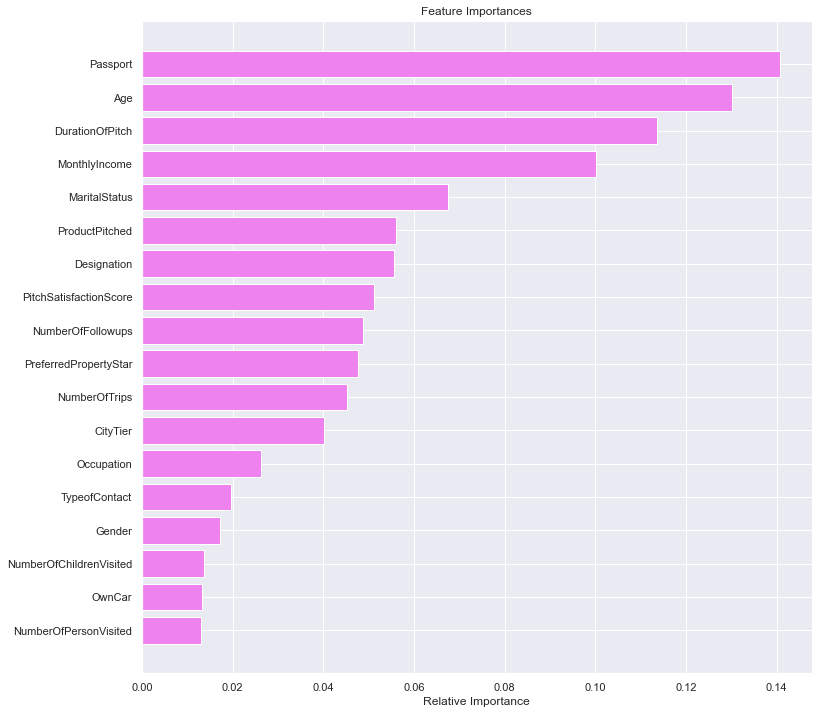

In [120]:
#checking feature importance

importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [121]:
# Choose the type of classifier. 
rf_estimator_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "class_weight": [{0: 0.3, 1: 0.7}],
    "n_estimators": [100,150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7},
                       max_features=0.6000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=5,
                       n_estimators=200, random_state=1)

In [122]:
%%time
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_weighted_score=get_metrics_score(rf_estimator_weighted)

Accuracy on training set :  0.9333528208126279
Accuracy on test set :  0.8773006134969326
Recall on training set :  0.7676282051282052
Recall on test set :  0.5405405405405406
Precision on training set :  0.8523131672597865
Precision on test set :  0.7843137254901961
Wall time: 343 ms


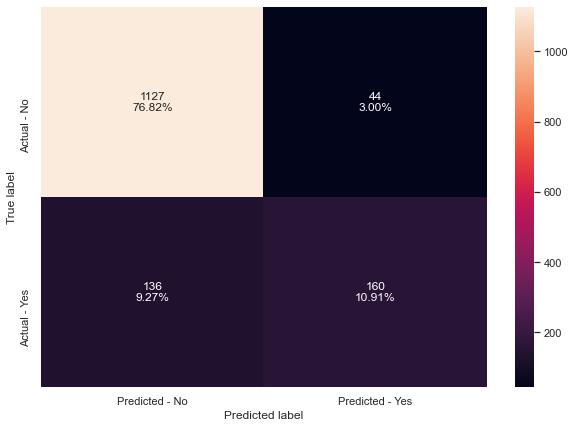

In [123]:
make_confusion_matrix(rf_estimator_weighted,y_test)

- Model accuracy increased a bit and recall metrics has also improved.
- Train and test have increased as well.
- RF model with class weights is now a lot better.

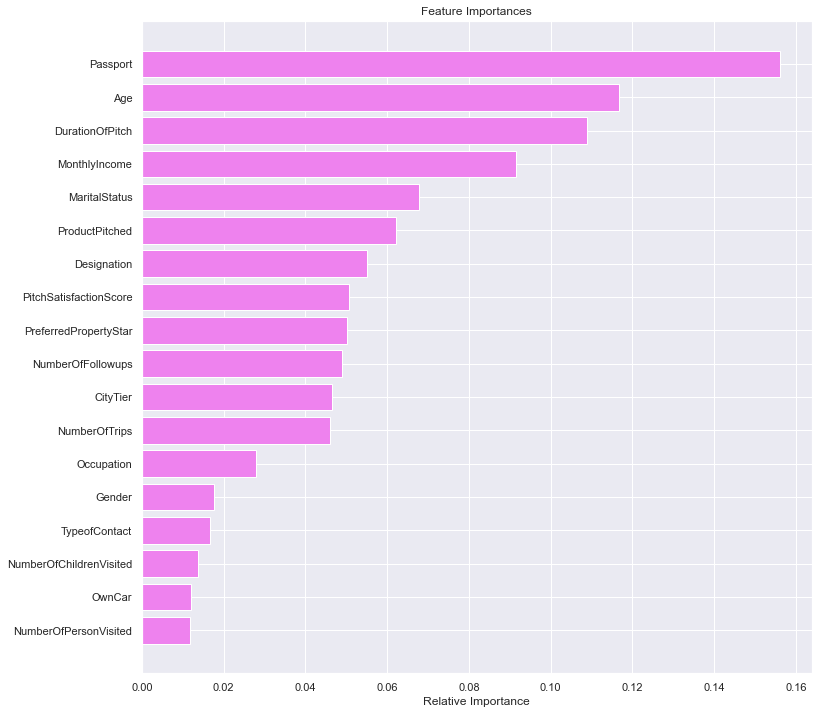

In [124]:
importances = rf_estimator_weighted.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Passport, Age, Duration & Monthly Income seems important. This result is similar to the decision tree model we built before.

In [125]:
#comparing All models now:

In [126]:
models = [bagging_estimator,bagging_estimator_tuned,bagging_lr,rf_estimator,rf_estimator_tuned,
          rf_estimator_weighted]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [127]:
comparison_frame = pd.DataFrame({'Model':['Bagging classifier with default parameters','Tuned Bagging Classifier',
                                        'Bagging classifier with base_estimator=LR', 'Random Forest with deafult parameters',
                                         'Tuned Random Forest Classifier','Random Forest with class_weights'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

Model  Train_Accuracy  Test_Accuracy  \
0  Bagging classifier with default parameters            0.99           0.91   
1                    Tuned Bagging Classifier            1.00           0.92   
2   Bagging classifier with base_estimator=LR            0.83           0.82   
3       Random Forest with deafult parameters            1.00           0.91   
4              Tuned Random Forest Classifier            0.92           0.86   
5            Random Forest with class_weights            0.93           0.88   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0          0.97         0.59             1.00            0.91  
1          1.00         0.65             1.00            0.95  
2          0.14         0.13             0.72            0.74  
3          1.00         0.60             1.00            0.94  
4          0.61         0.36             0.95            0.83  
5          0.77         0.54             0.85            0.78

**Model Evaluation**
- I believe Random forest with class weights has much better recall (barring bagging classifier which is overfitted) numnbers and the accuracy is also not bad. 

## <a id = "link11"></a> Adaboost, XGBoost, Gradient Boost and Stacking Classifier

In [130]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_r2=metrics.r2_score(y_train,pred_train)
    test_r2=metrics.r2_score(y_test,pred_test)
    train_rmse=np.sqrt(metrics.mean_squared_error(y_train,pred_train))
    test_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_test))
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-square on training set : ",metrics.r2_score(y_train,pred_train))
        print("R-square on test set : ",metrics.r2_score(y_test,pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))
    
    # returning the list with train and test scores
    return score_list

In [131]:
#Ada boost

In [132]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [133]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.8500438468284127
Accuracy on test set :  0.8384458077709611
Recall on training set :  0.34455128205128205
Recall on test set :  0.30743243243243246
Precision on training set :  0.6739811912225705
Precision on test set :  0.7398373983739838


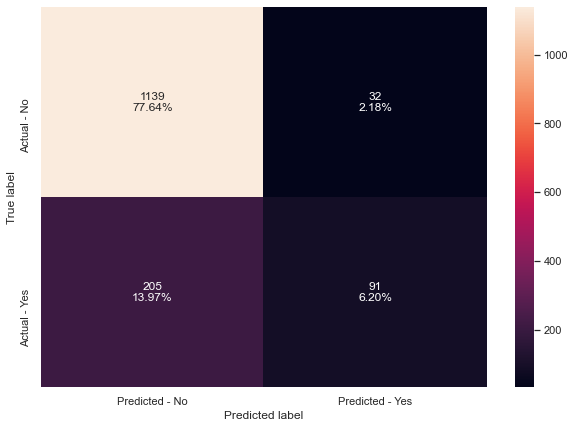

In [134]:
make_confusion_matrix(abc,y_test)

- Training accuracy and testing accuracy seems to be same so I dont see any overfitting.
- Recall is .33 which is not good.

In [135]:
#Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [136]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.890382928968138
Accuracy on test set :  0.8500340831629175
Recall on training set :  0.4807692307692308
Recall on test set :  0.3310810810810811
Precision on training set :  0.8547008547008547
Precision on test set :  0.8166666666666667


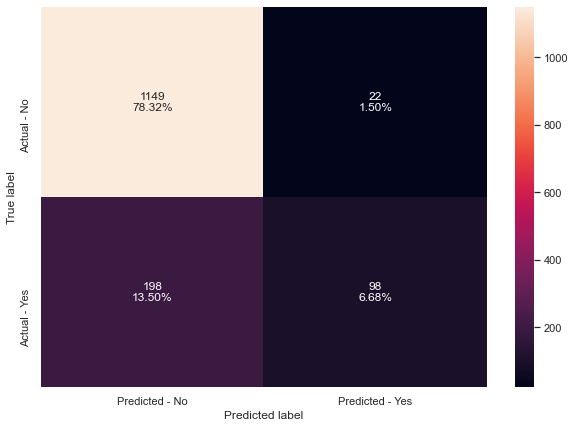

In [137]:
make_confusion_matrix(gbc,y_test)

In [138]:
#XGBoost Classifier

In [139]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

[00:17:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [140]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  1.0
Accuracy on test set :  0.9331970006816632
Recall on training set :  1.0
Recall on test set :  0.7027027027027027
Precision on training set :  1.0
Precision on test set :  0.9541284403669725


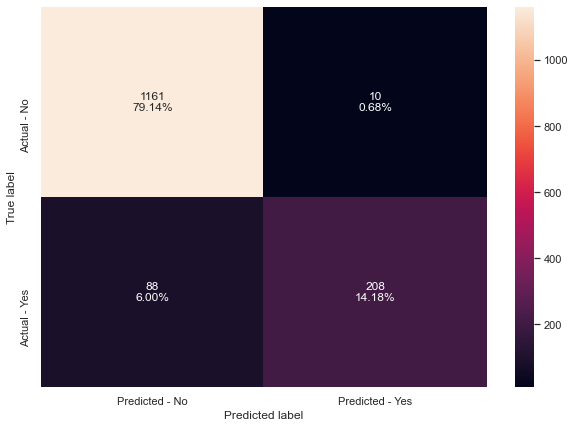

In [141]:
make_confusion_matrix(xgb,y_test)

- With default parameters, XGboost has better accuracy than Adaboost but since the recall on training and test are different for XG boost, I feel that the model is overfitting.

In [142]:
#Hyperparameter Tuning

In [143]:
#Ada boost

# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.6, n_estimators=100, random_state=1)

In [144]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.9885998246126864
Accuracy on test set :  0.8738922972051807
Recall on training set :  0.9599358974358975
Recall on test set :  0.5709459459459459
Precision on training set :  0.9771615008156607
Precision on test set :  0.7444933920704846


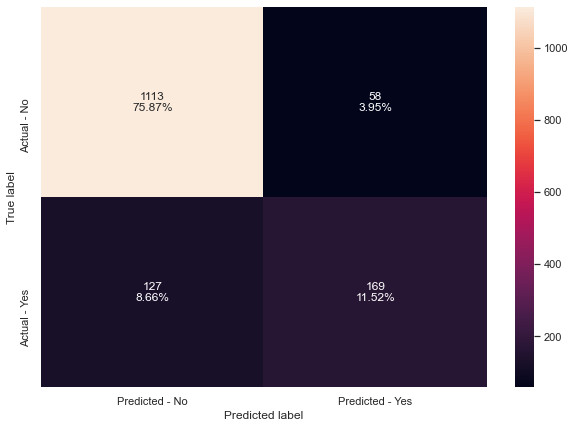

In [145]:
make_confusion_matrix(abc_tuned,y_test)

- Compared to Adaboost default, this model is overfitting the data.

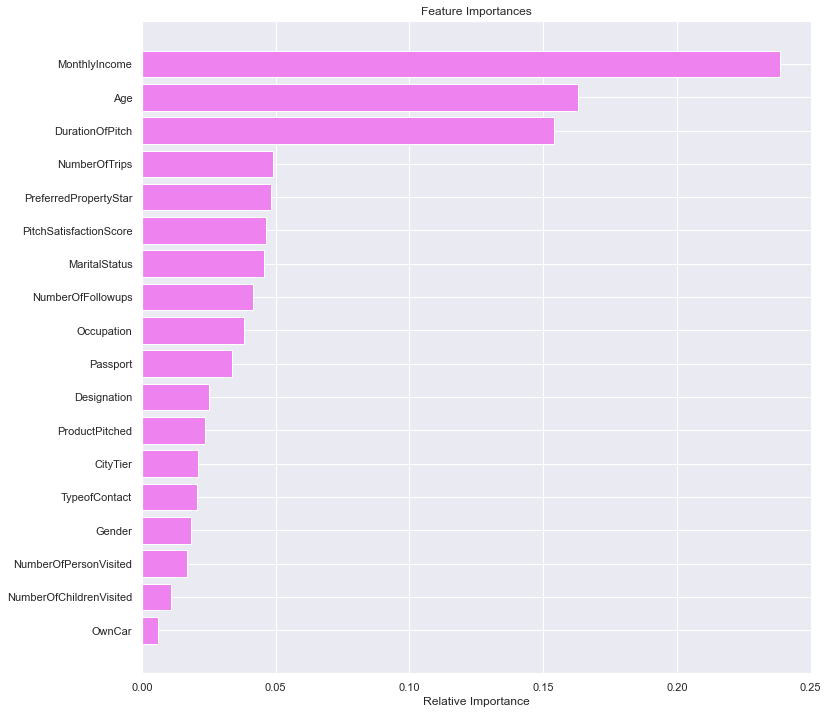

In [146]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Monthly Income, Age, Duration of Pitch and Number of Trips are important.

In [147]:
#using adaboost classifer as the estimator for initial predictions

gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [148]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_init_score=get_metrics_score(gbc_init)

Accuracy on training set :  0.8865828705057001
Accuracy on test set :  0.8513974096796183
Recall on training set :  0.46474358974358976
Recall on test set :  0.34459459459459457
Precision on training set :  0.8430232558139535
Precision on test set :  0.8095238095238095


Test accuracy and test recall have increased slightly.
As we are getting better results, we will use init = AdaBoostClassifier() to tune the gradient boosting model.

In [149]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=250, random_state=1,
                           subsample=0.8)

In [150]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.9289681379713534
Accuracy on test set :  0.8738922972051807
Recall on training set :  0.655448717948718
Recall on test set :  0.44594594594594594
Precision on training set :  0.9359267734553776
Precision on test set :  0.8627450980392157


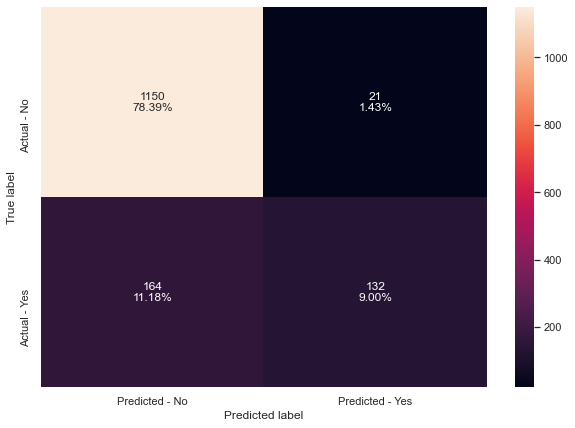

In [151]:
make_confusion_matrix(gbc_tuned,y_test)

- Model performance is ok and accuracy seems to be overfitting.

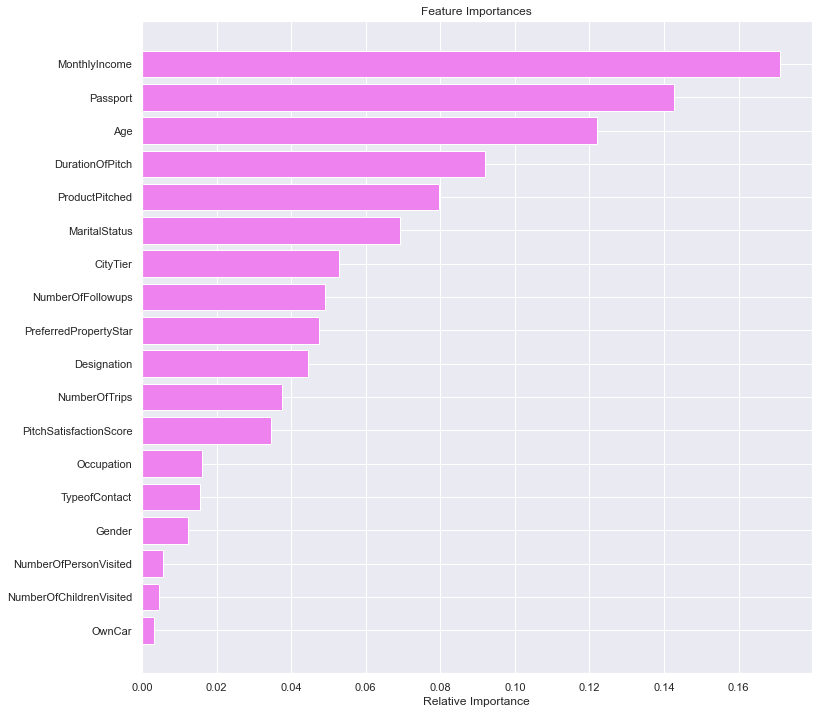

In [152]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Monthly Income, Age and Passport seems to be the top 3 features

In [409]:
#XGBoost hyper parameter tuning

In [155]:
%%time
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

Wall time: 2h 8min 52s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=3, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=70, n_jobs=12,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [156]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_tuned_score=get_metrics_score(xgb_tuned)

Accuracy on training set :  0.9456299327681964
Accuracy on test set :  0.8957055214723927
Recall on training set :  0.969551282051282
Recall on test set :  0.777027027027027
Precision on training set :  0.783678756476684
Precision on test set :  0.7255520504731862


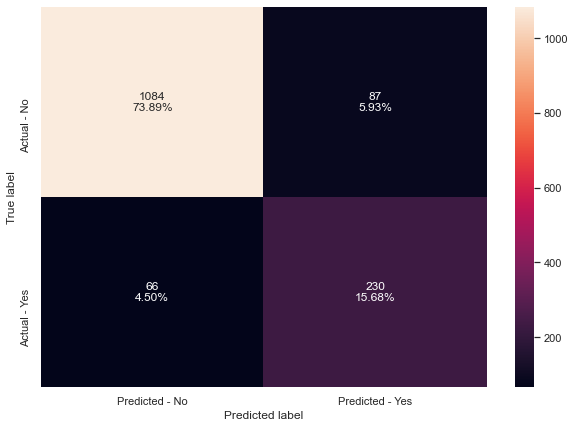

In [157]:
make_confusion_matrix(xgb_tuned,y_test)

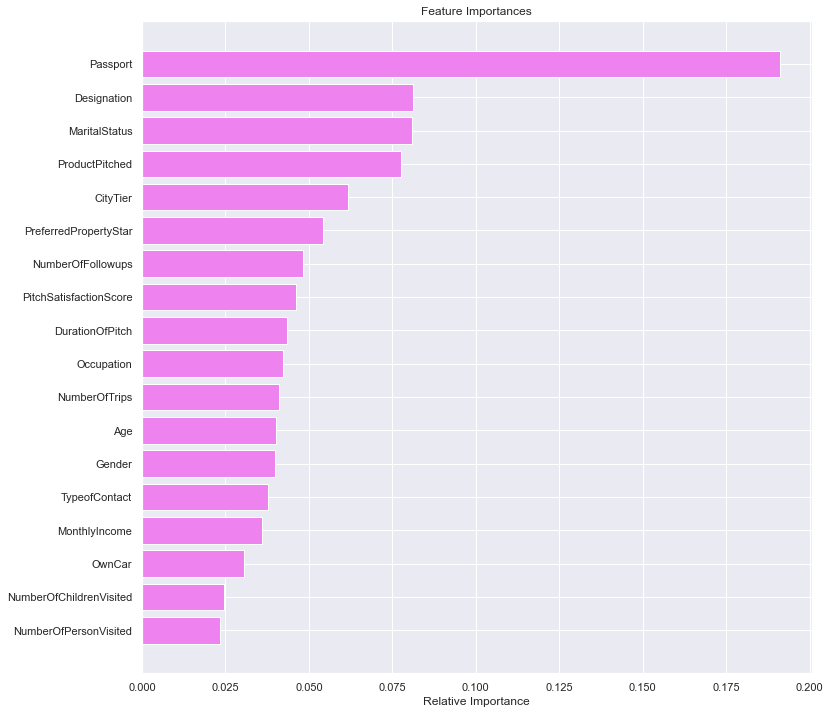

In [158]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Passport, Designation, Marital status and Product pitched comes as predominant factors. This is slightly different than the other 2 tuned models such as Adaboost and Gradient boost where Monthly Income came as predominant factor.

In [171]:
#stacking model
estimators=[('Decision Tree', dTree1),('Random Forest', rf_estimator),
           ('Gradient Boosting', gbc_tuned)]
final_estimator=XGBClassifier(random_state=1)

models = [bagging_estimator,bagging_estimator_tuned,bagging_lr,rf_estimator,rf_estimator_tuned,
          rf_estimator_weighted]



In [172]:
from sklearn.ensemble import StackingClassifier
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

[07:47:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(max_depth=3,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=250,
                                                           random_state=1,
                                                           subsample=0.8))],
                   final_estimator=XGBClassifier(base_sc...
                                                 importance_type='gain',
                                                 interaction_constraint

In [175]:
stacking_estimator_score=get_model_score(stacking_estimator)

R-square on training set :  0.99411972993042
R-square on test set :  0.5556033189466152
RMSE on training set :  0.02961311480163639
RMSE on test set :  0.267534375598332


## <a id = "link12"></a> Comparing all models

In [180]:
models = [bagging_estimator,bagging_estimator_tuned,bagging_lr,rf_estimator,rf_estimator_tuned,
          rf_estimator_weighted, abc,gbc, xgb, abc_tuned,gbc_init,xgb_tuned,stacking_estimator]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [183]:
comparison_frame = pd.DataFrame({'Model':['Bagging classifier with default parameters','Tuned Bagging Classifier','Bagging classifier with base_estimator=LR', 'Random Forest with deafult parameters',
                                         'Tuned Random Forest Classifier','Random Forest with class_weights','Ada Boost with default parameters','Gradient Boosting with default parameters', 'XGBoost with default parameters', 'Adaboost Tuned', 'Gradient Boosting tuned','XGBoost tuned', 'Stacking'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

Model  Train_Accuracy  Test_Accuracy  \
0   Bagging classifier with default parameters            0.99           0.91   
1                     Tuned Bagging Classifier            1.00           0.92   
2    Bagging classifier with base_estimator=LR            0.83           0.82   
3        Random Forest with deafult parameters            1.00           0.91   
4               Tuned Random Forest Classifier            0.92           0.86   
5             Random Forest with class_weights            0.93           0.88   
6            Ada Boost with default parameters            0.85           0.84   
7    Gradient Boosting with default parameters            0.89           0.85   
8              XGBoost with default parameters            1.00           0.93   
9                               Adaboost Tuned            0.99           0.87   
10                     Gradient Boosting tuned            0.89           0.85   
11                               XGBoost tuned            0.95           0.90   
12                                    Stacking            1.00           0.93   

    Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0           0.97         0.59             1.00            0.91  
1           1.00         0.65             1.00            0.95  
2           0.14         0.13             0.72            0.74  
3           1.00         0.60             1.00            0.94  
4           0.61         0.36             0.95            0.83  
5           0.77         0.54             0.85            0.78  
6           0.34         0.31             0.67            0.74  
7           0.48         0.33             0.85            0.82  
8           1.00         0.70             1.00            0.95  
9           0.96         0.57             0.98            0.74  
10          0.46         0.34             0.84            0.81  
11          0.97         0.78             0.78            0.73  
12          1.00         0.77             1.00            0.86

**Insights**
- Adaboost tuned, XGBoost tuned are the best models here with a recall score > .96 in training the training numbers also doesn't vary much.

- Some of the models had an accuracy of 1 in training which indicates that the models would be overfitting.

- Random Forest provided some valuable recommendations from a visual perspective

## <a id = "link13"></a>  Insights & Recommendations

- We can use these predictive models to identify if a customer will be willing to buy a package in the future and what parameters will influence the customer to buy.

- Passport, Monthly Income, Age & desgination plays an important role in the predictability of cutomers buying behaviour. 

- An individual/customer can be targeted based on the parameters above.

- The marketing cost can certainly be reduced if the marketing campaigns target customers individuals without passport, monthly income between 20K-35K and an average age based on the products.